### Importing Necessary Libraries

In [612]:
import pandas as pd
import numpy as np
import scipy
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
warnings.filterwarnings('ignore')


### Load the Data

In [613]:
df=pd.read_csv('../input/adult1/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Rows and columns in the dataset

In [614]:
df.shape

(48842, 15)

Statistical Summary of the Dataset

In [615]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Columns Datatypes

In [616]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [617]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

#### Median Imputation For Treating the outliers
<span style="color:#12ba66">Basically what we gonna do.
    <li>We gonna find the outlier using IQR-Inter Quartile Range <li> we will replace the outlier by median of that column 

In [618]:
def mi(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    med = np.median(df[col]) #This the Median for that column
    for i in df[col]:
        if(i>Upper_tail or i<Lower_tail):
            df[col]=df[col].replace(i,med)
    sns.boxplot(x=col,data=df)
            


#### BoxCox Function Body For Treating outliers

In [619]:
def bxcx(col):
    data = df[col].values
    df[col], fitted_lambda= scipy.stats.boxcox(data[data > 0])
    sns.boxplot(x=col,data=df)


#### Module for Log-Transformation

In [620]:
def lo(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    train['Cost of Living Index'] = np.log(train['Cost of Living Index'])
    sns.boxplot(x=col,data=df)
            


#### It seems that it does not have any missing or Null values

#### Lets see the age Column :

In [621]:
df.age.unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86])

#### Required plots for AGE columns

In [622]:
def plot(col):       
    f, axes = plt.subplots(2,2,figsize=(10,10))
    sns.boxplot(x=df[col],orient='v' , ax=axes[0,0])
    sns.histplot(x=df[col], ax=axes[0,1])
    sns.distplot(x=df[col], ax=axes[1,0])





#### Plotting the AGE column

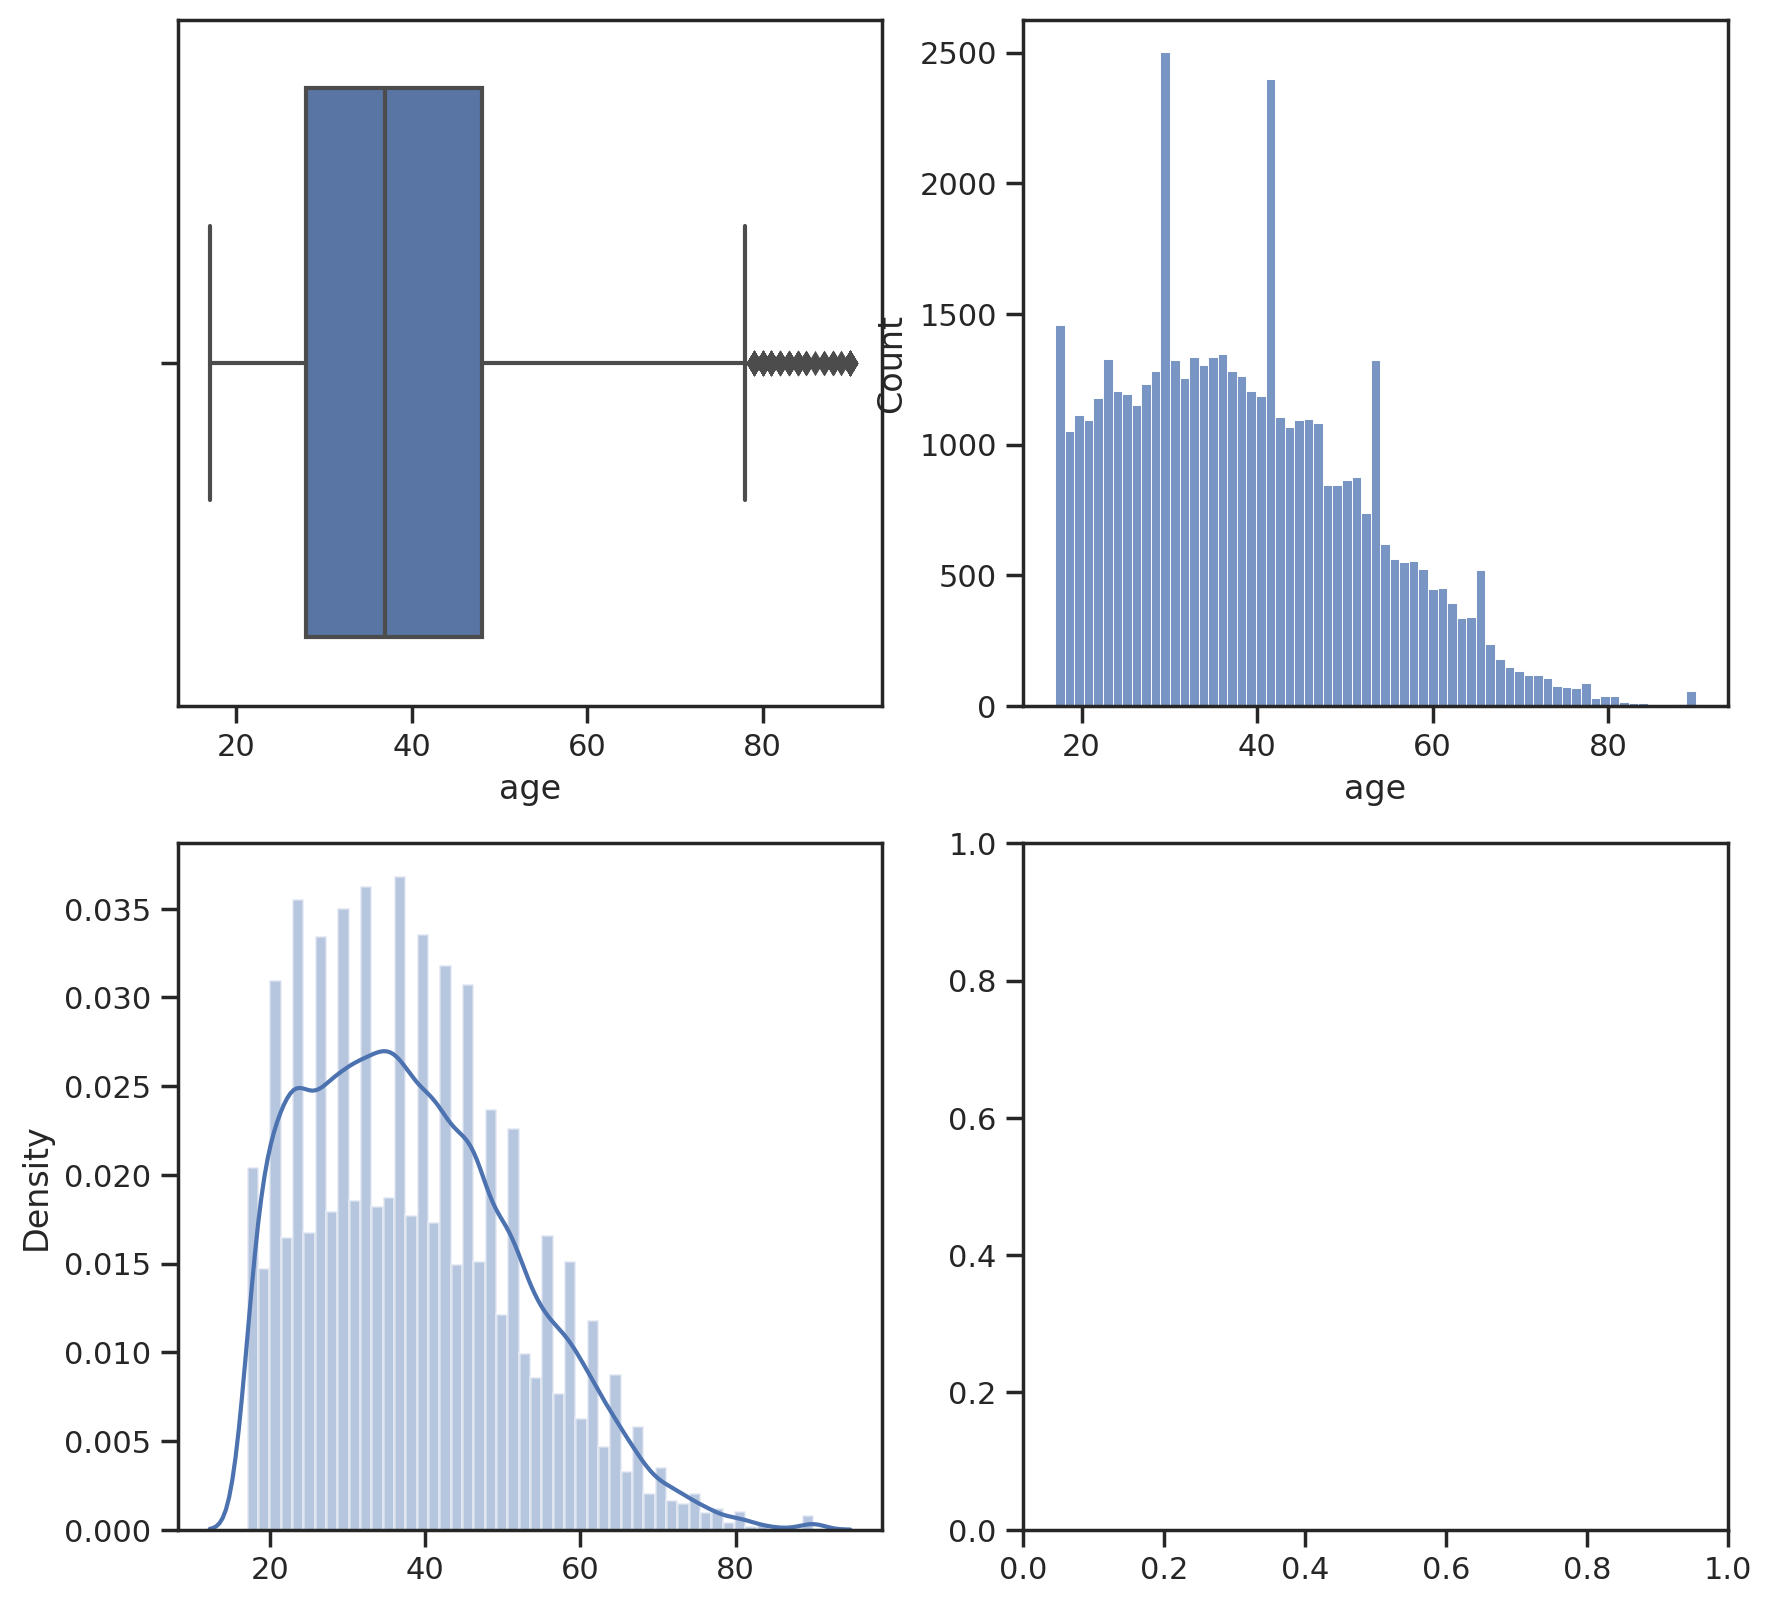

In [623]:
plot('age')

#### From the plots we can clearly see that the distribution is right skewed

### Try to Beat the outliers using Median imputation

In [624]:
#  mi('age')

##### Since we have got some outliers after appyling median imputation
### Try to Beat the outliers using Median imputation

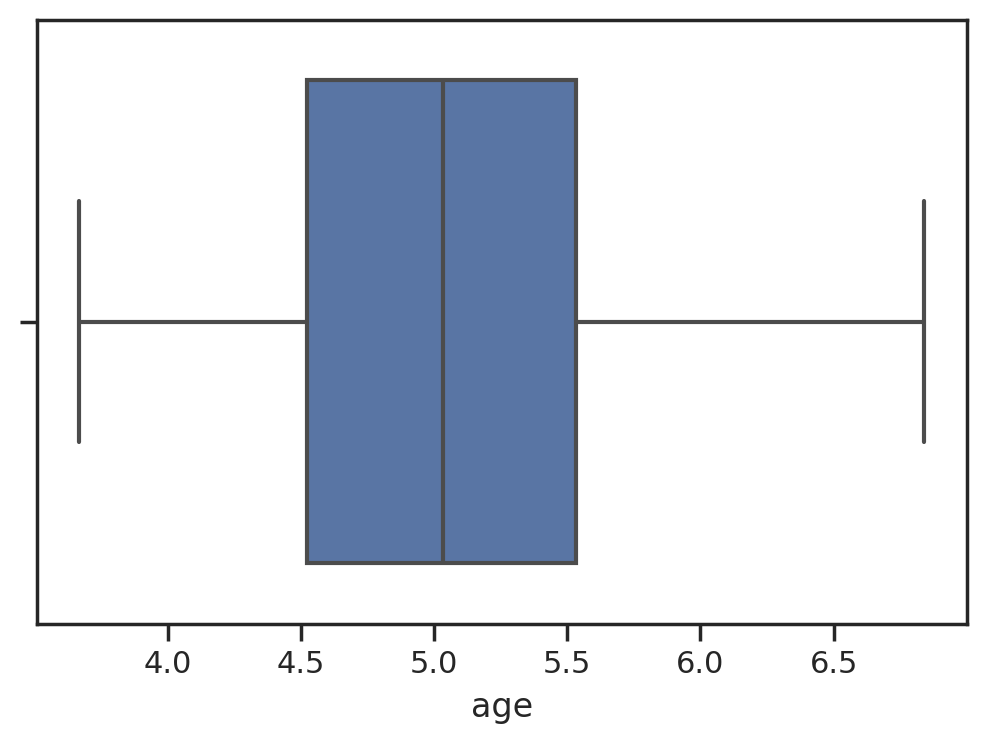

In [625]:
bxcx('age')

<AxesSubplot:>

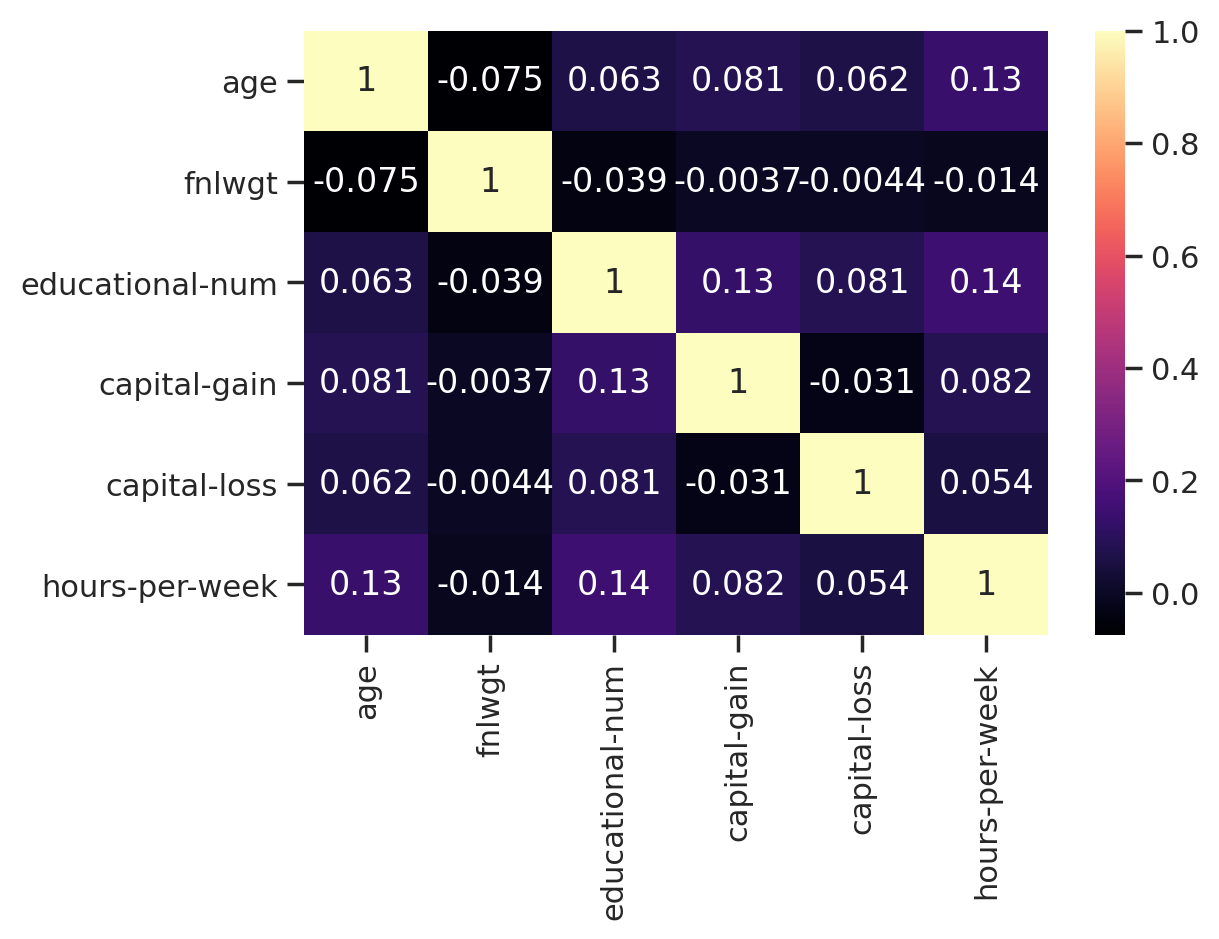

In [626]:
sns.heatmap(df.corr(),cmap='magma',annot=True)

#### From the above Heatmap we can see that fnlwgt is showing neative correlation. So we can simply remove this

### Lets see the Unique Values for Every Column. Because checking for individual column will be too much time consuming.

### Columns Names

In [627]:
col=df.columns.values

In [628]:
for i in col:
    print('--'*20,i,'--'*20,'\n',df[i].unique())
    print('--'*20,i+'Value_counts','--'*20)
    print(df[i].value_counts())

---------------------------------------- age ---------------------------------------- 
 [4.32100588 5.08350285 4.52190782 5.36394248 3.76064417 4.87548078
 4.5849267  6.08168698 4.24960858 5.80483054 6.1463366  4.98187735
 4.39008405 5.91232293 5.53381768 5.31948908 3.93687544 5.03325682
 5.18080623 6.36039864 5.40756983 4.099116   4.17571263 5.76792386
 4.76378766 5.45040433 5.84118757 3.66638737 5.13266932 5.69238562
 4.01959022 5.27417422 4.8203326  4.64617711 5.49247718 5.22796008
 3.8506743  6.27085942 5.61441056 4.70576523 5.94713426 5.57445346
 5.65371353 4.45700344 5.87701273 6.01532092 6.1142202  6.55792203
 6.38956098 5.73044879 6.50301107 6.58494847 6.04872479 4.9293063
 6.24029878 6.17804781 6.44691024 5.98146206 6.20936498 6.33090012
 6.30105673 6.84091797 6.61169754 6.4183955  6.53061179 6.63817548
 6.66438827 6.71604147 6.47511295 6.69034174 6.81640897 6.79167166
 6.76670127 6.7414929 ]
---------------------------------------- ageValue_counts ----------------------------

#### Education_nums

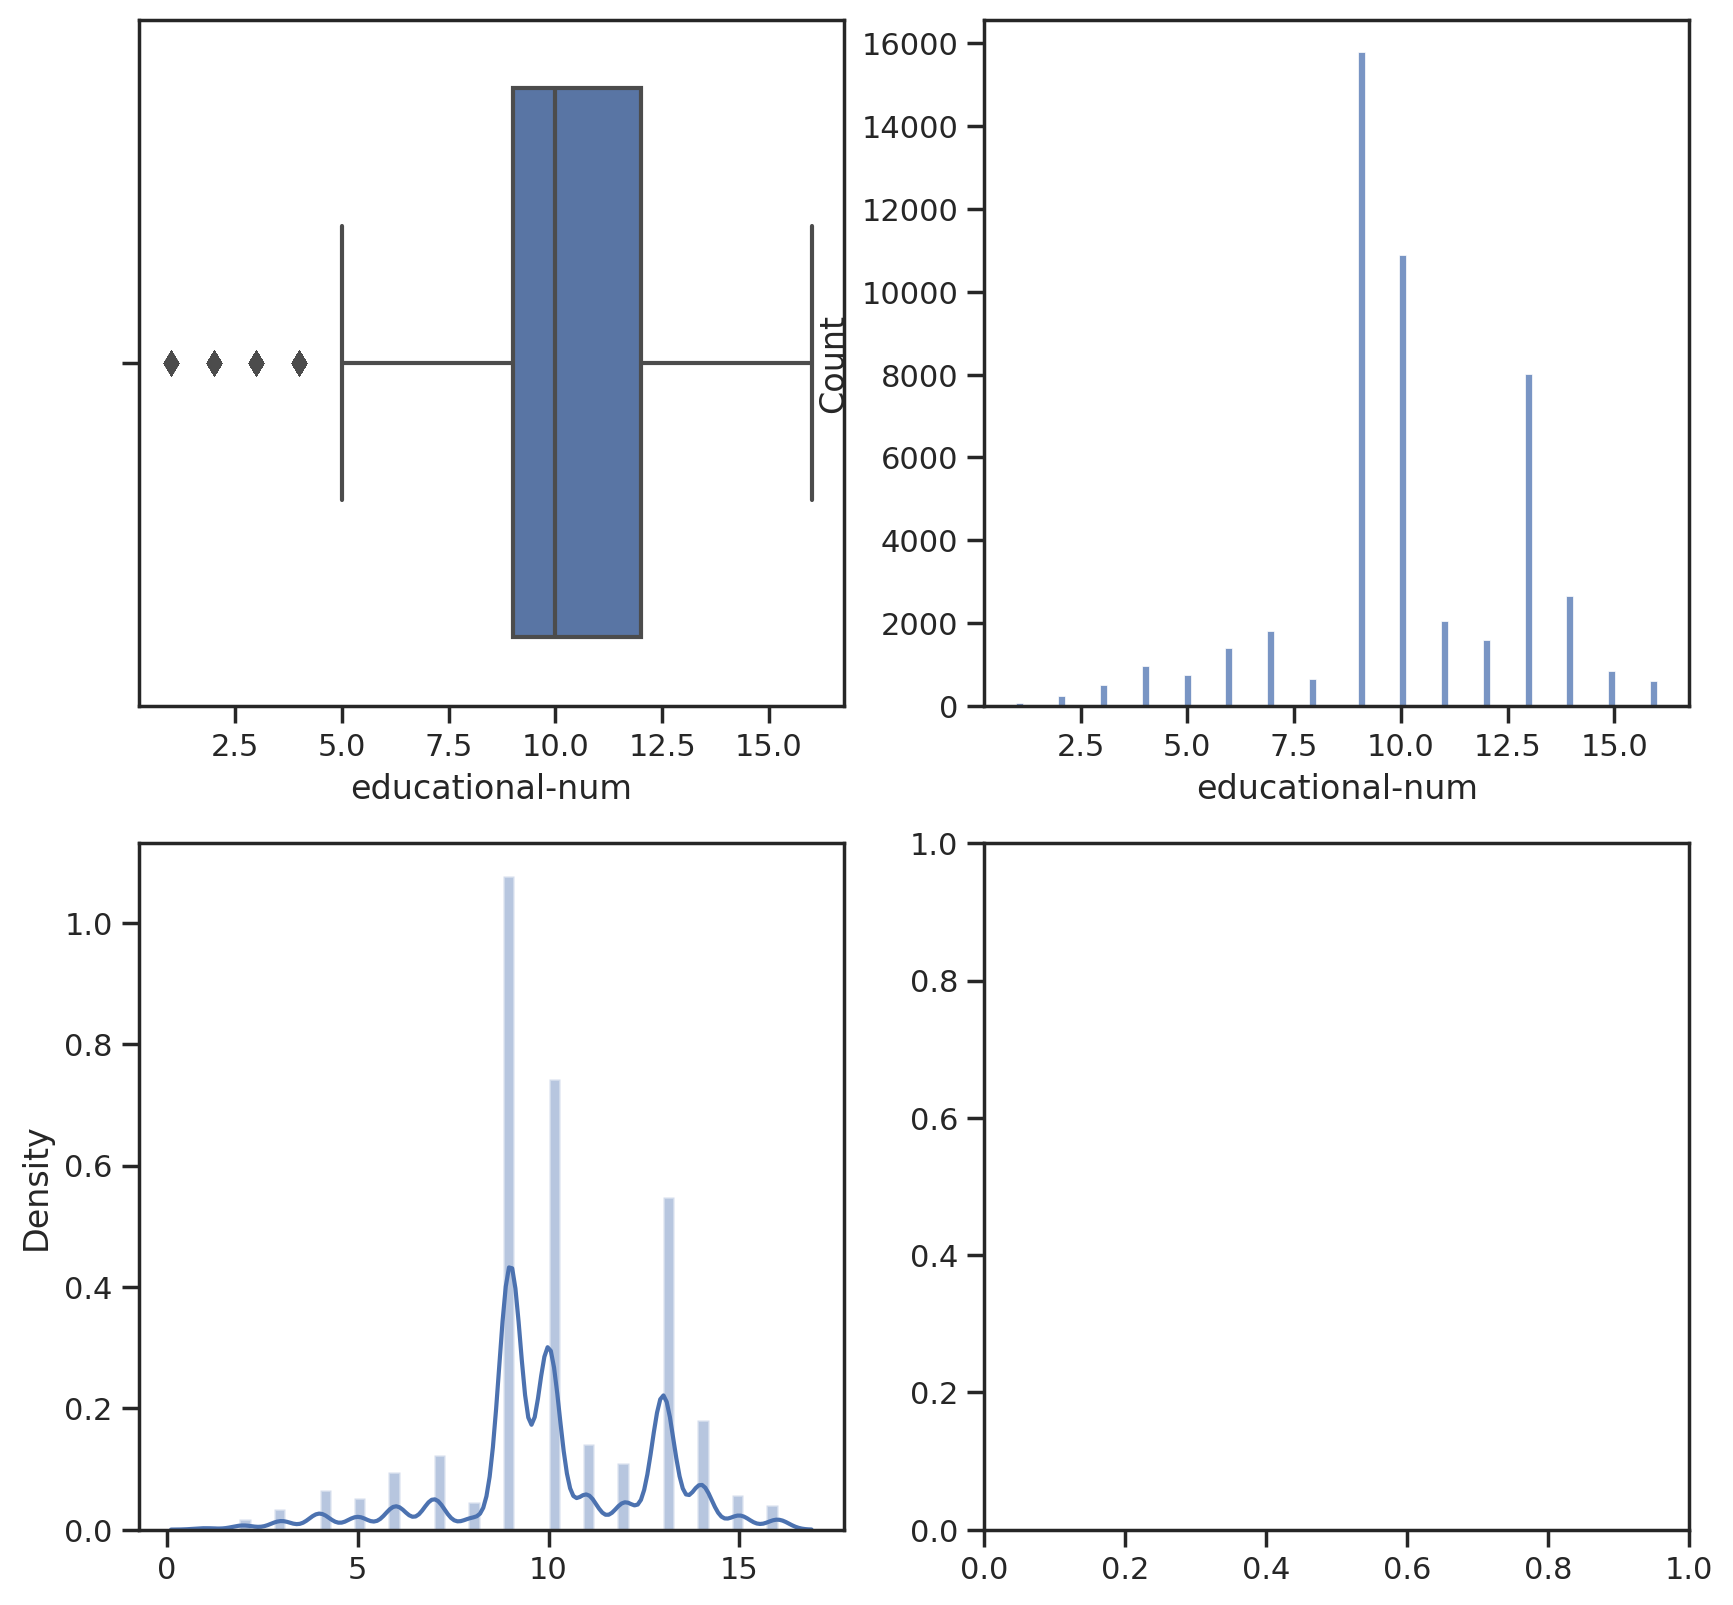

In [629]:
plot('educational-num')

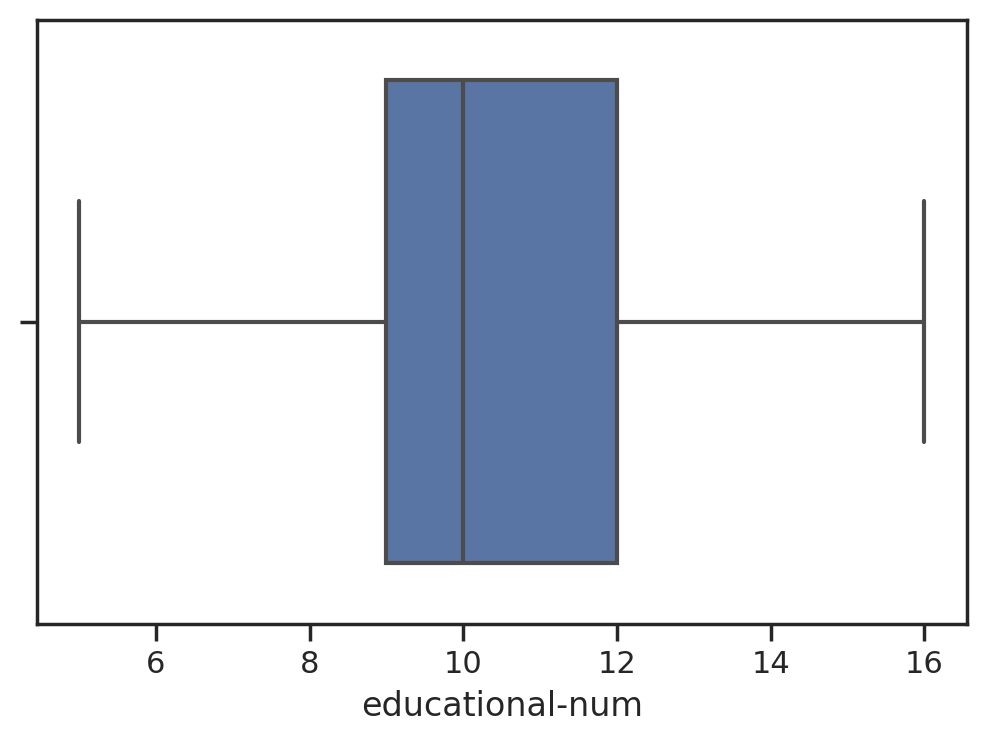

In [630]:
mi('educational-num')

### Univariate Analysis of Workclass

In [631]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

##### It contains ? values in the column. Since we have seen that Workclass is object so we can't take the median or mean in this case -- This will be Problamatic. So we simply remove it.

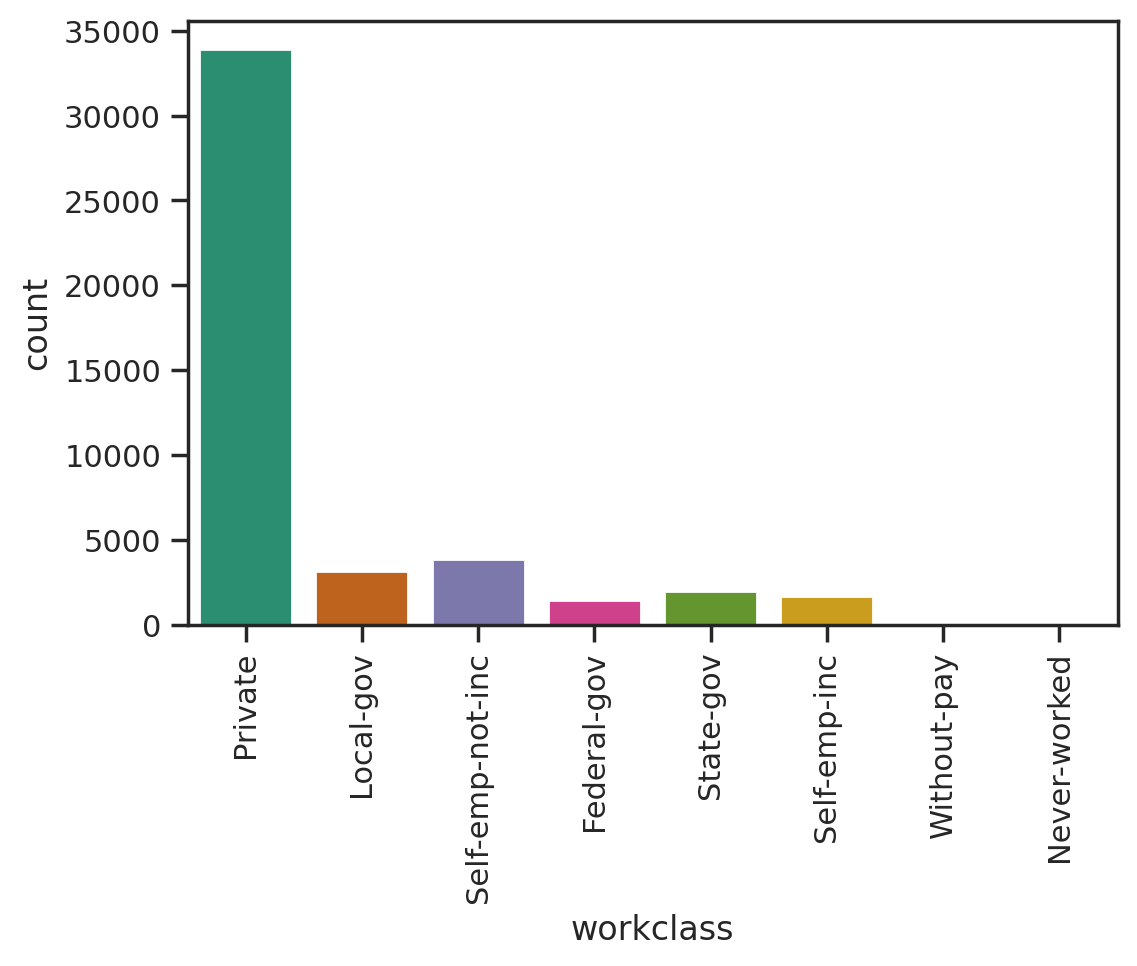

In [632]:

df = df[df['workclass'] != "?"] ## Removing the ? from the columns of Workclass
plt.xlim(0,34000)
sns.countplot(x=df['workclass'],data=df,palette="Dark2")
plt.xticks(rotation=90)

plt.show()

##### From the above grah we can simply says that majority of the peoples are doing their job in private sectors -  33906


### Univariate Analysis of Education


In [633]:
df['education'].value_counts()

HS-grad         14974
Some-college    10038
Bachelors        7772
Masters          2590
Assoc-voc        1978
11th             1634
Assoc-acdm       1529
10th             1241
7th-8th           845
Prof-school       810
9th               687
12th              599
Doctorate         576
5th-6th           468
1st-4th           229
Preschool          73
Name: education, dtype: int64

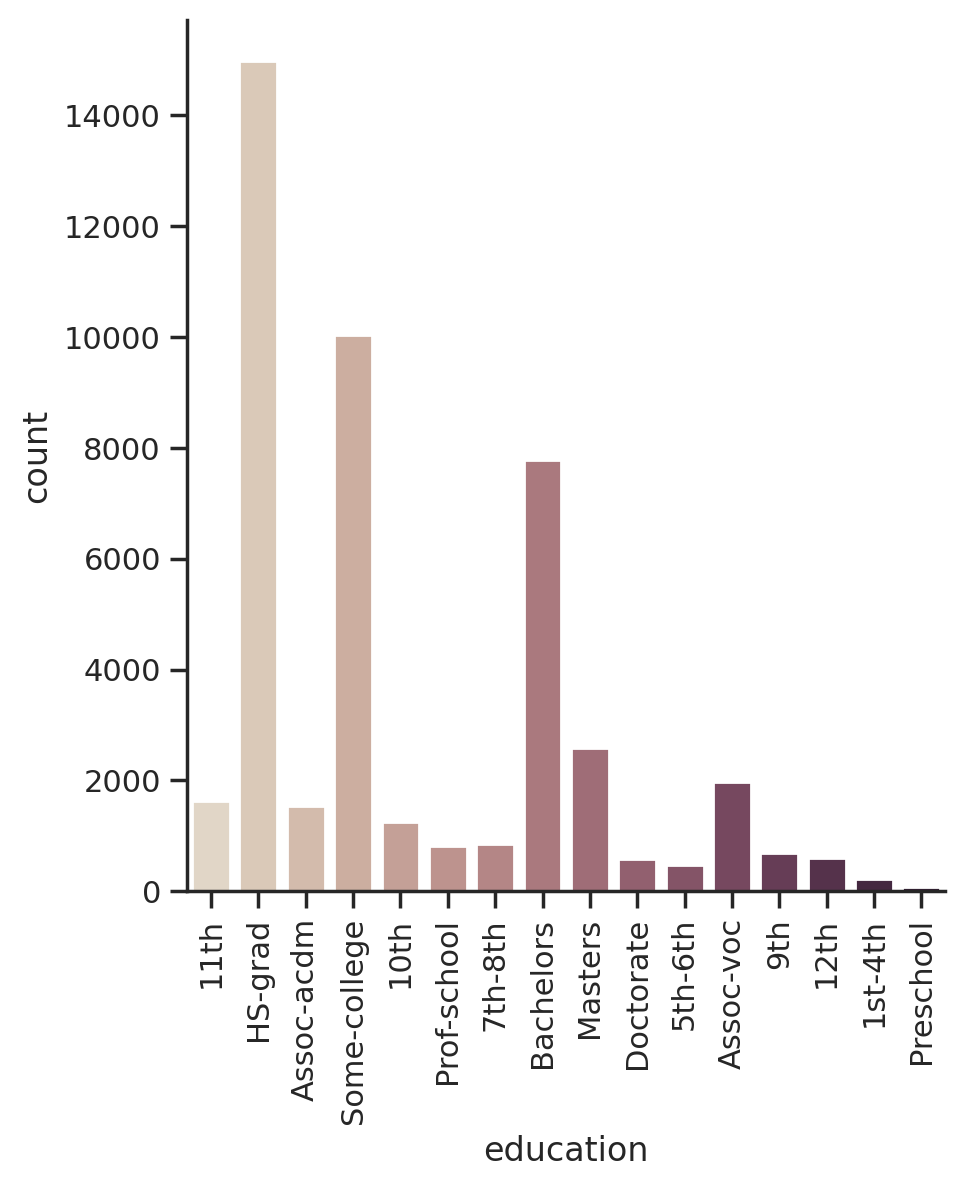

In [634]:

sns.catplot(x="education", kind="count", palette="ch:.25", data=df)
plt.xticks(rotation=90)
plt.show()



#### We can clearly see that the majority of the peoples are HS-grad and Less peoples are Doctorate

 ### Univariate Analysis of Education


In [635]:
df['marital-status'].value_counts()

Married-civ-spouse       21452
Never-married            14882
Divorced                  6364
Separated                 1433
Widowed                   1296
Married-spouse-absent      584
Married-AF-spouse           32
Name: marital-status, dtype: int64

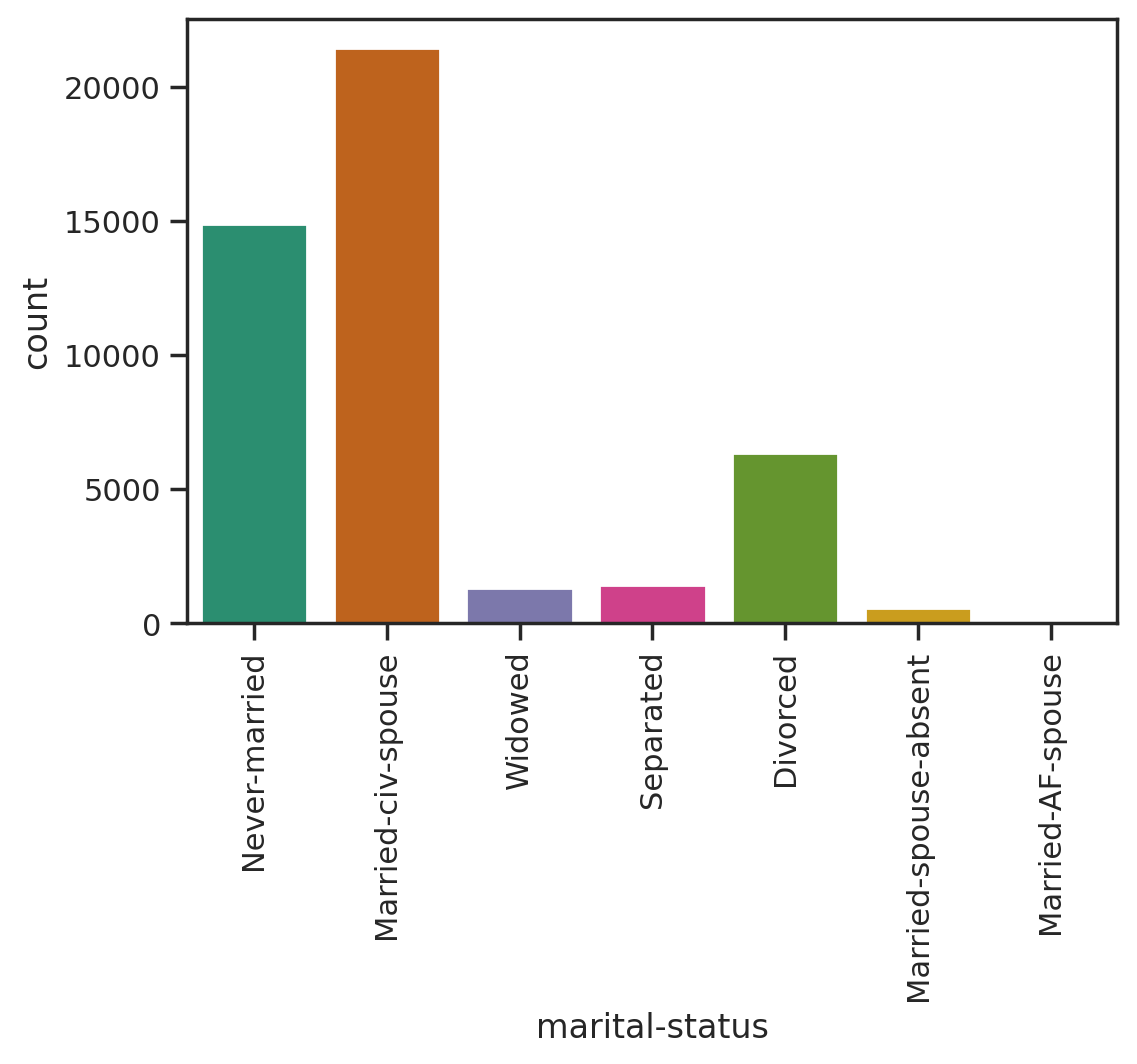

In [636]:
sns.countplot(x=df['marital-status'],data=df,palette="Dark2")

plt.xticks(rotation=90)
plt.show()



##### Most of the Employees here are civilian Spouses. And there are less peoples are working here whose spouses are working at Armed Forces

 ### Univariate Analysis of occupation


In [637]:
df.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces', '?'],
      dtype=object)

#### We can see that the column contains ? in the column.so we need to remove these rows

In [638]:
df = df[df['occupation'] != "?"]

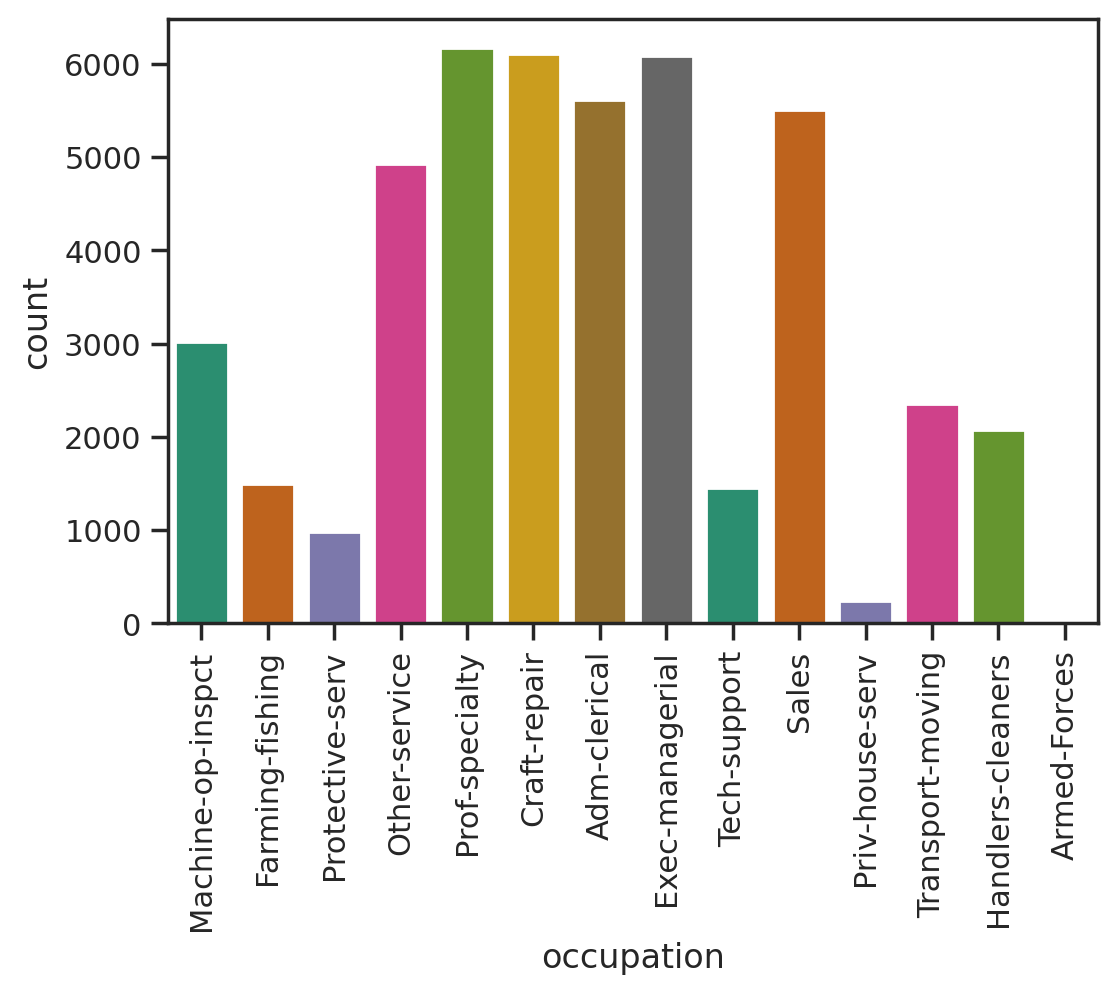

In [639]:
sns.countplot(x=df['occupation'],data=df,palette="Dark2")

plt.xticks(rotation=90)
plt.show()

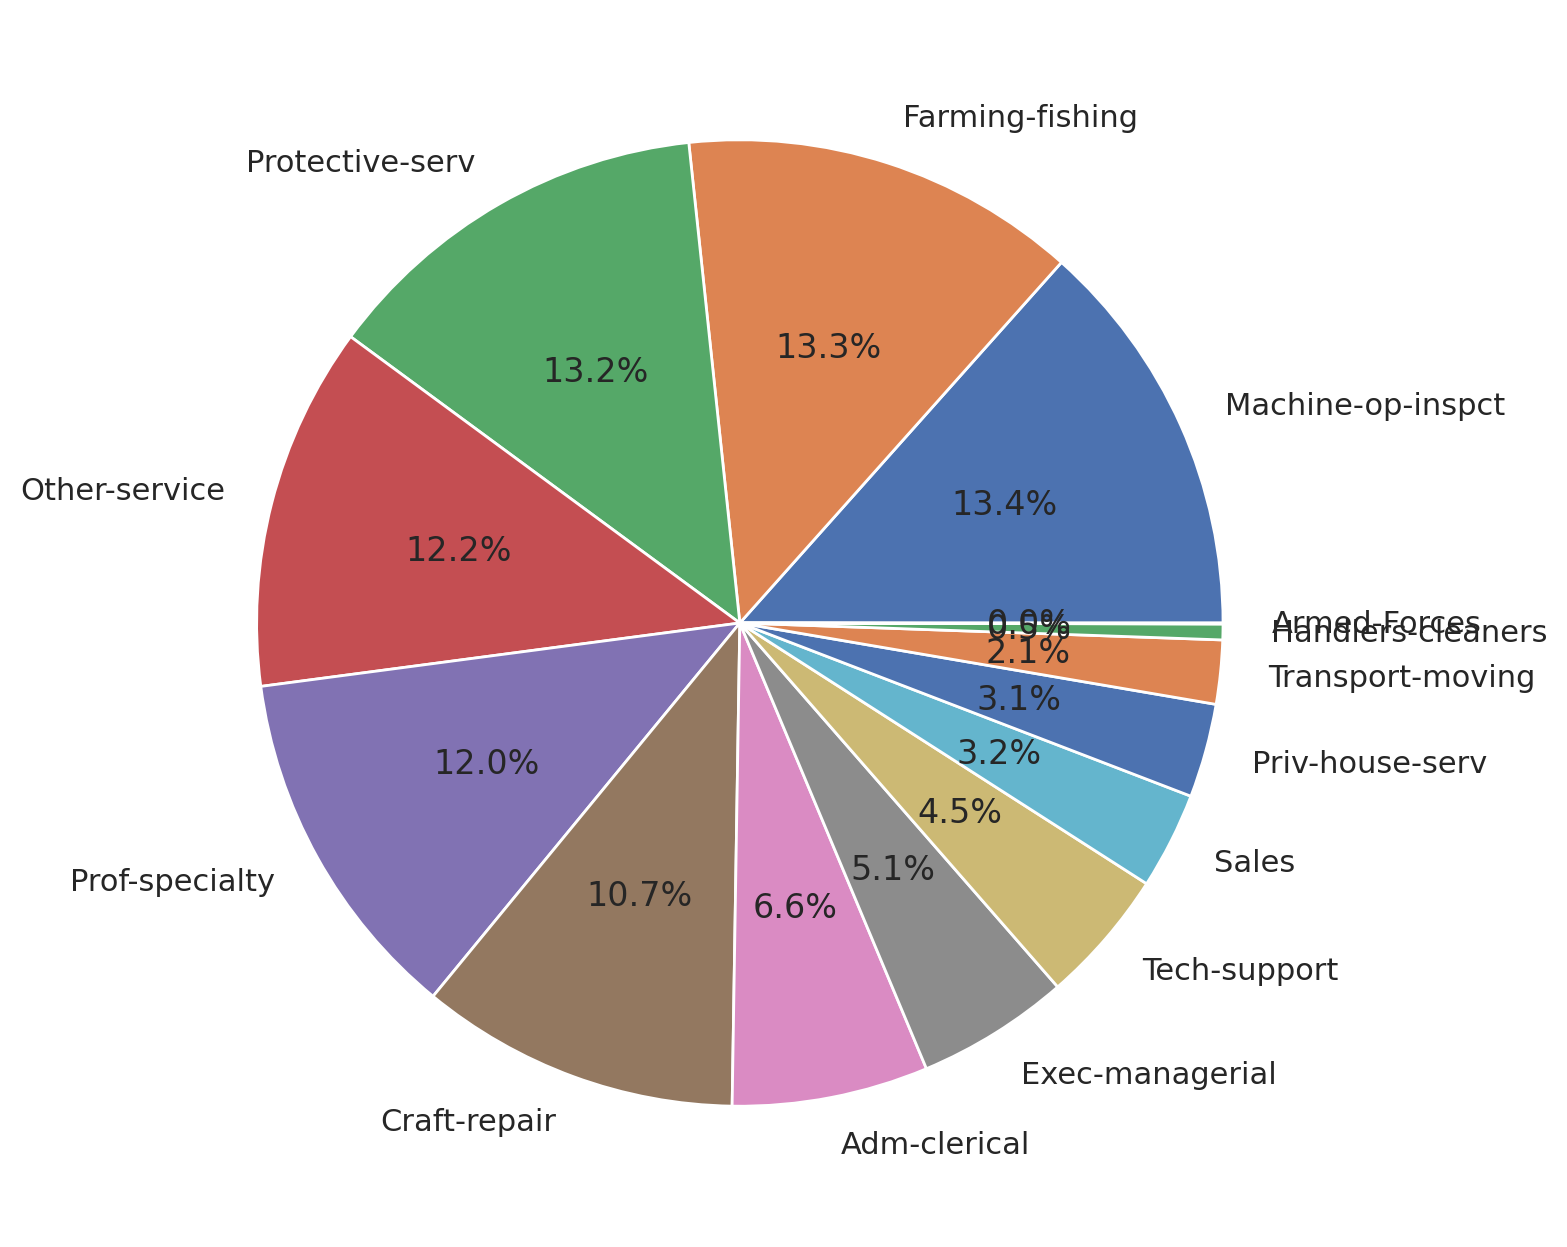

In [640]:
plt.figure(figsize=(15,8))
labels=df.occupation.unique()
data=df.occupation.value_counts()
plt.pie(data,labels=labels,autopct="%.1f%%")
plt.show()



#### Majority of the peoples are doing Fishing and Farming

In [641]:
df.relationship.unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

 ### Univariate Analysis of Race


In [642]:
df.race.unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

##### Since 72% of the citizens living in USA are White American(note: the U.S. the U.S. Source sensus), we will reduce race category into two categories White and others.It will also helpful when we will do dummies it will reduce the no the columns in the dataset. 

In [643]:
df.loc[df['race'] != 'White', 'race'] = 'Other'
df.race.value_counts()

White    39444
Other     6589
Name: race, dtype: int64

#### Countplot of Race

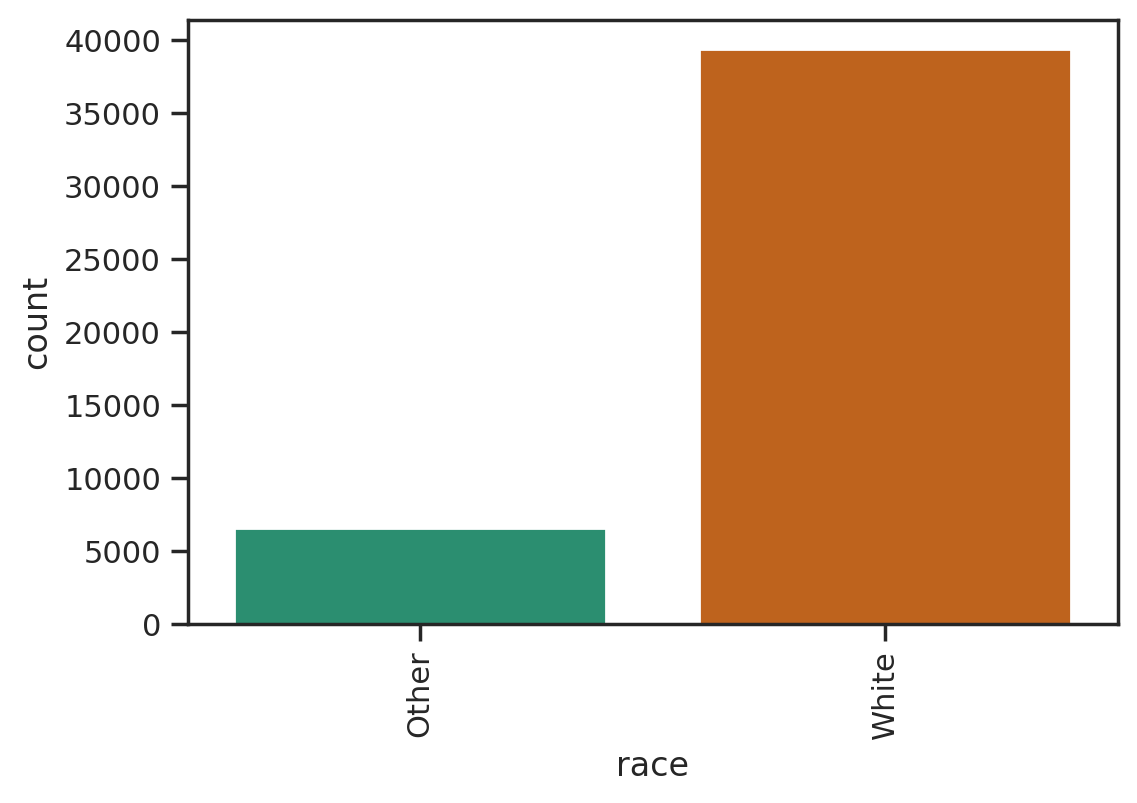

In [644]:
sns.countplot(x=df['race'],data=df,palette="Dark2")

plt.xticks(rotation=90)
plt.show()

#### Pie Chart of Races

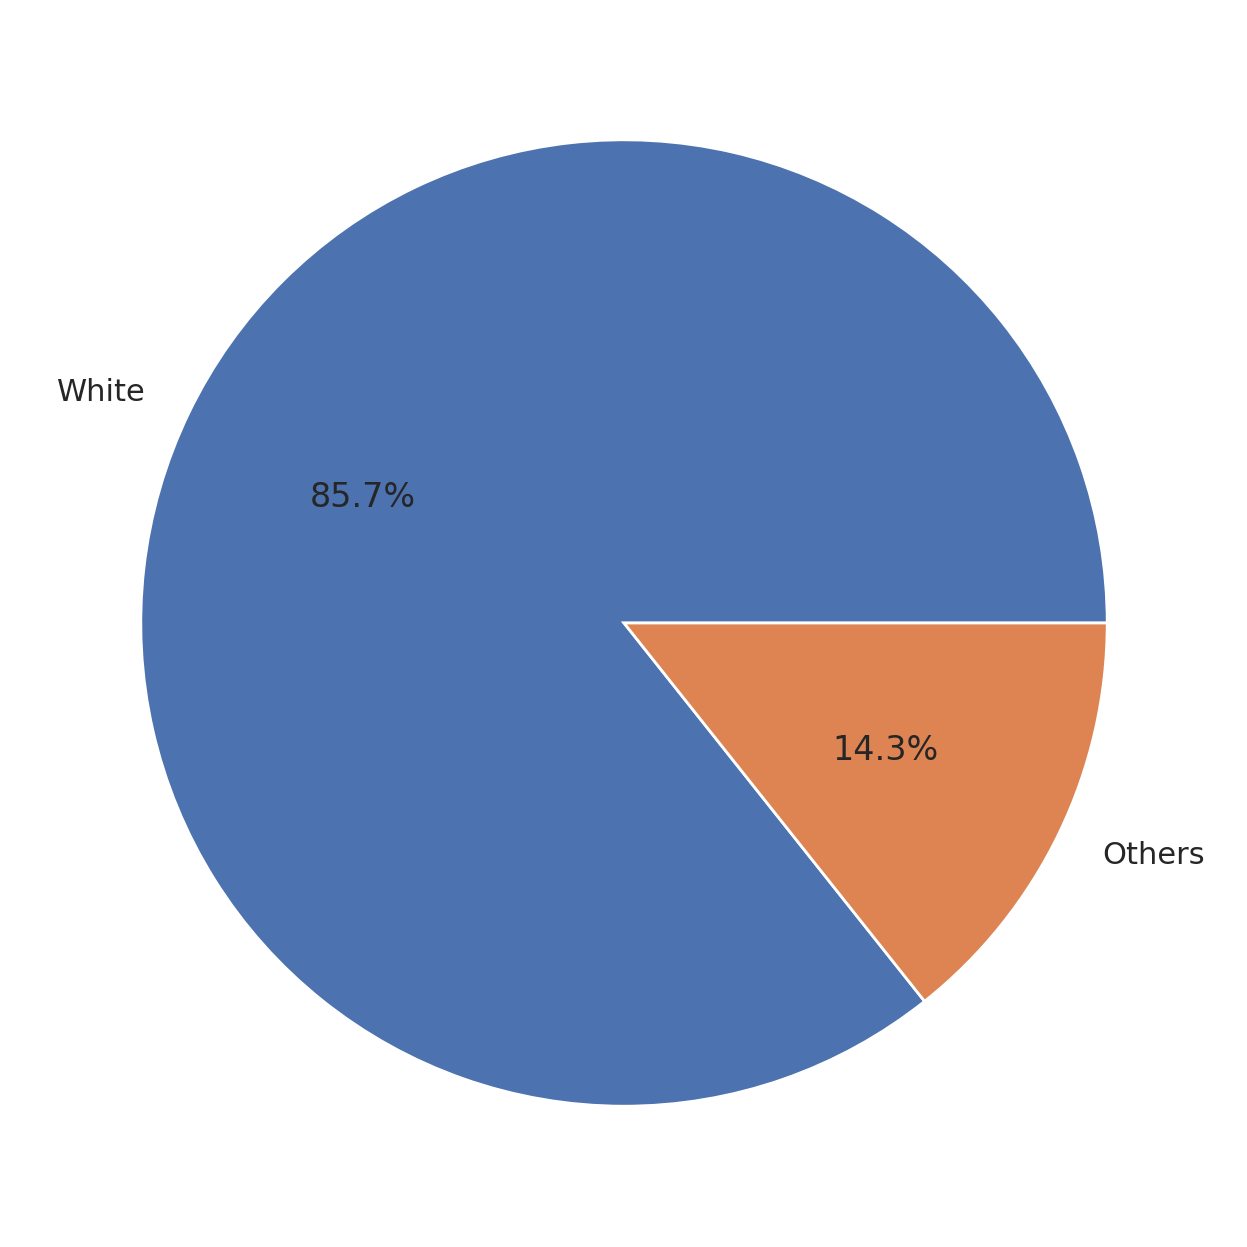

['White', 'Others']

In [645]:
plt.figure(figsize=(15,8))
labels=['White','Others']
data=df.race.value_counts()
plt.pie(data,labels=labels,autopct="%.1f%%")
plt.show()
labels


#### From the above pie chart we have sucessfully satifies the us census data

### Univariate Analysis of Gender


In [646]:
m=float(df.gender[df.gender=='Male'].value_counts())
f=float(df.gender[df.gender=='Female'].value_counts())
df.gender.value_counts()

Male      31114
Female    14919
Name: gender, dtype: int64

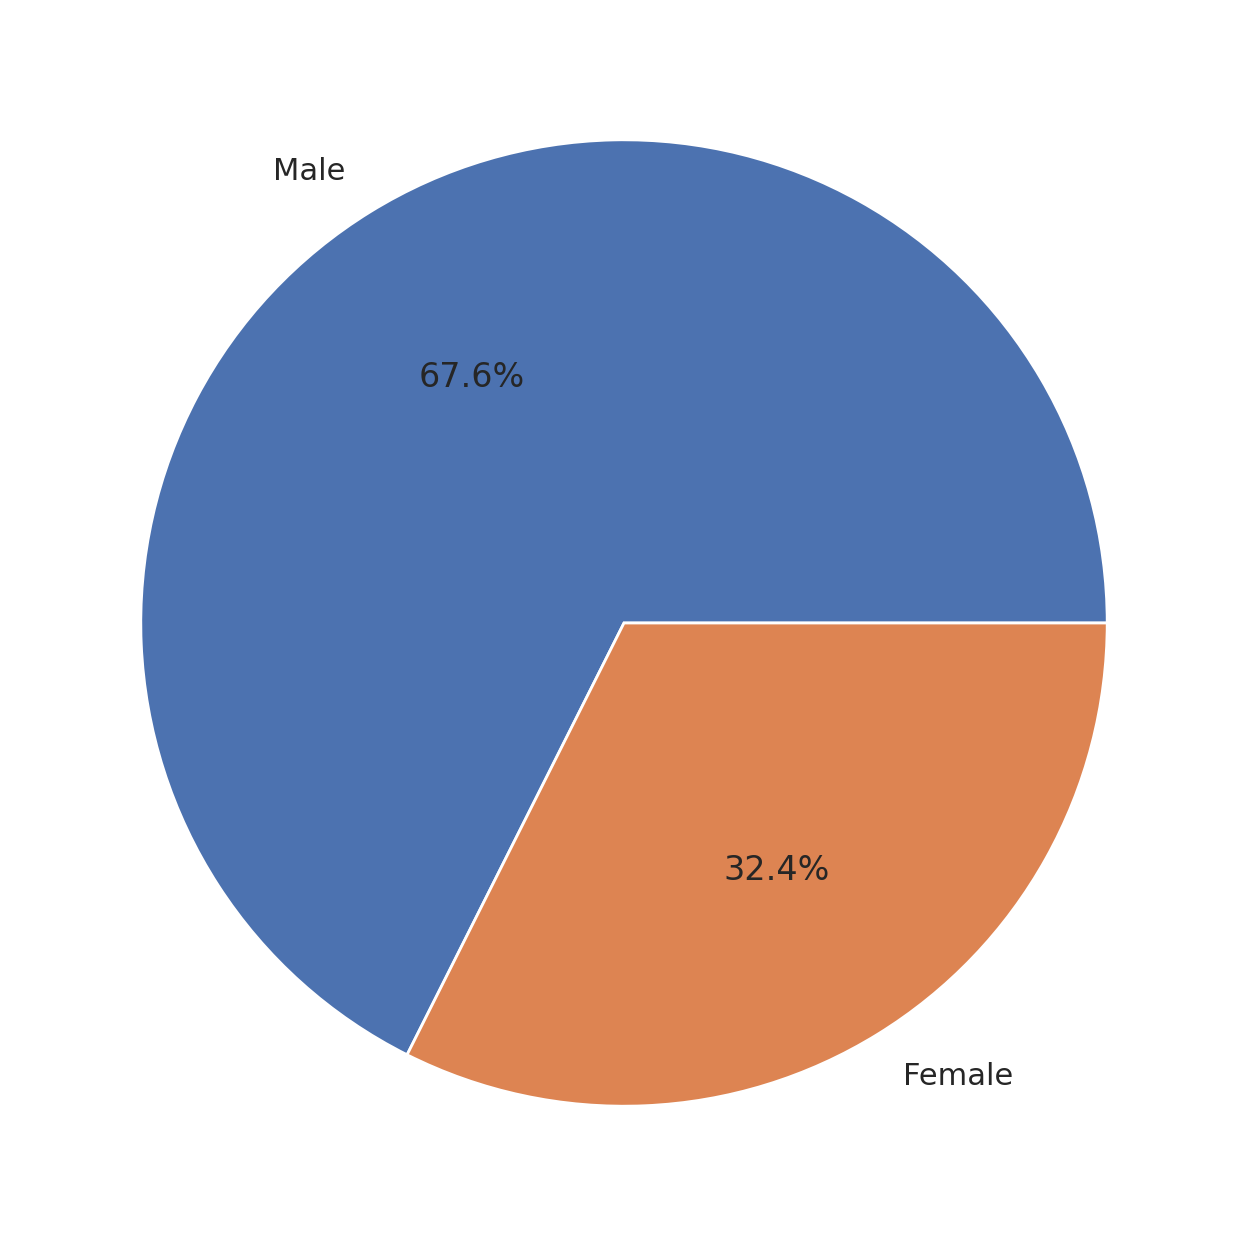

In [647]:
plt.figure(figsize=(15,8))
labels=['Male','Female']
data=df.gender.value_counts()
plt.pie(data,labels=labels,autopct="%.1f%%")
plt.show()

#### we can see that there are more males then Female in the census Data. <br> Male : Female Ratio 67.6% : 32.4%

In [648]:
print(m/f)

2.08552852067833


### Univariate Analysis of Capital_gains and capital_loss
There are two columns capital_gains and acpital_losses we can make it into one column.<br>
Captial=capital_gains-capital_loss


In [649]:
df['capital']=df['capital-gain']-df['capital-loss']
#now remove two unnecessary columns
#df.drop(['capital-loss','capital-gain'],inplace=True,axis=1)

In [650]:
df.capital.value_counts()

 0        39991
 15024      508
 7688       402
 7298       358
-1902       301
          ...  
-4356         1
 1731         1
-1911         1
-2163         1
-155          1
Name: capital, Length: 217, dtype: int64

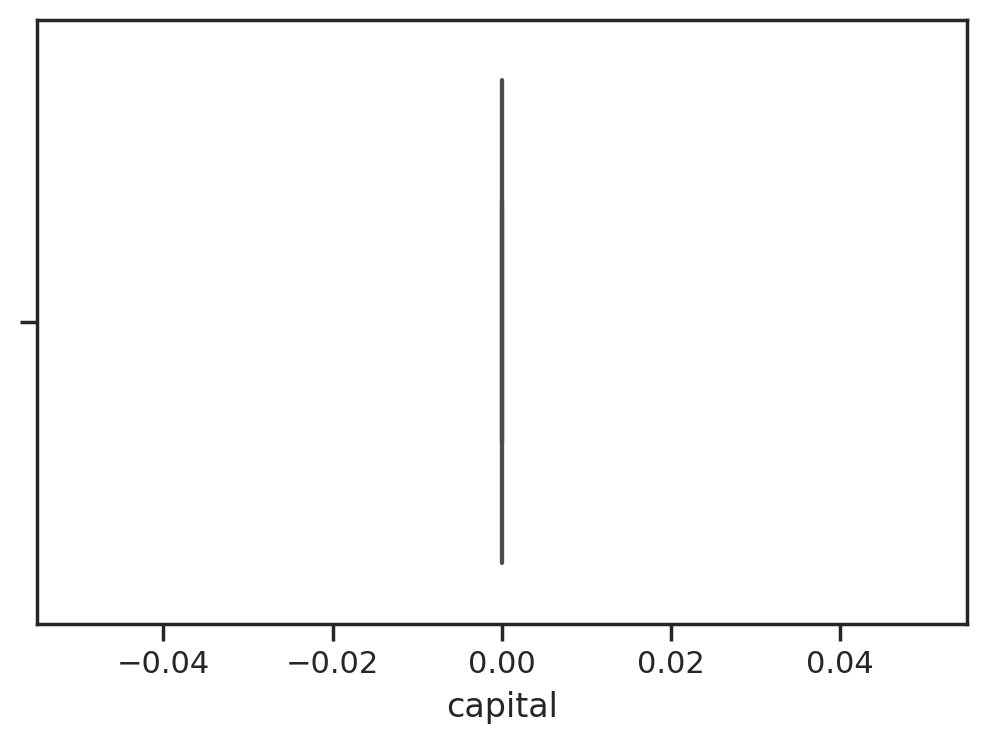

In [651]:
mi('capital')

### Univariate Analysis of hours-per-week


In [652]:
df['hours-per-week'].unique()

array([40, 50, 30, 32, 10, 39, 48, 25, 20, 45, 47, 35, 43, 90, 54, 60, 38,
       36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37, 12, 70, 15, 75,
       52, 84, 42, 80,  8, 68, 99, 65, 17, 72, 53, 96, 21, 46,  3,  1, 49,
       67, 76, 23,  2, 58, 26, 34,  4,  7, 51, 78, 63,  5, 31, 92, 77, 27,
       29, 85,  6, 13, 19, 98, 62, 66, 57, 86, 11, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95])

<AxesSubplot:xlabel='hours-per-week'>

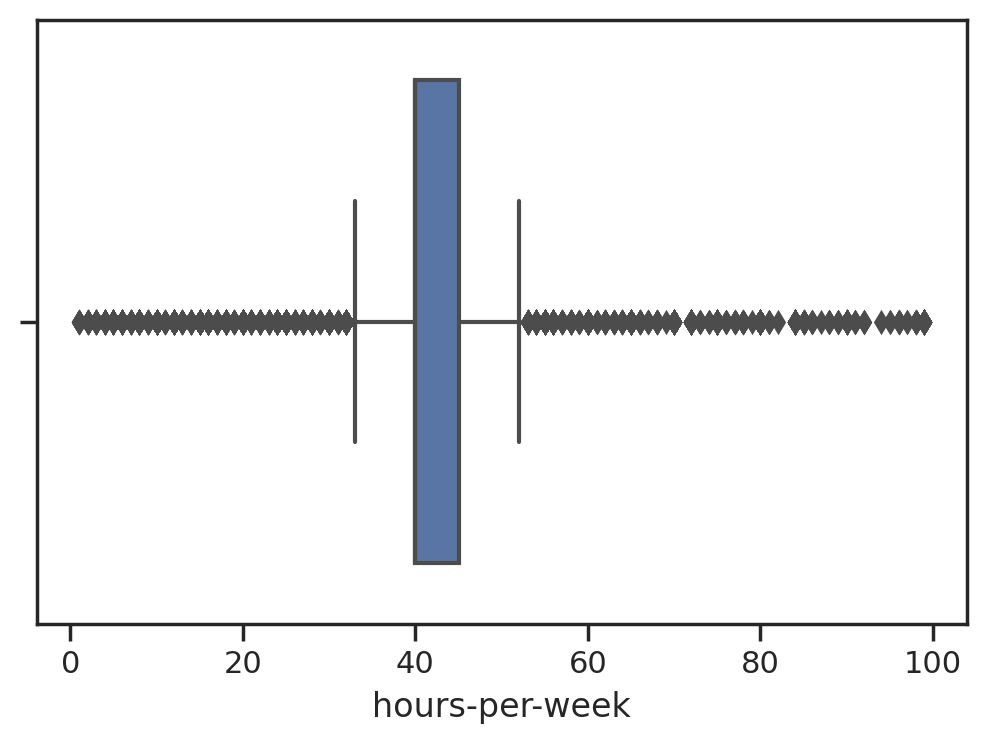

In [653]:
sns.boxplot(df['hours-per-week'])

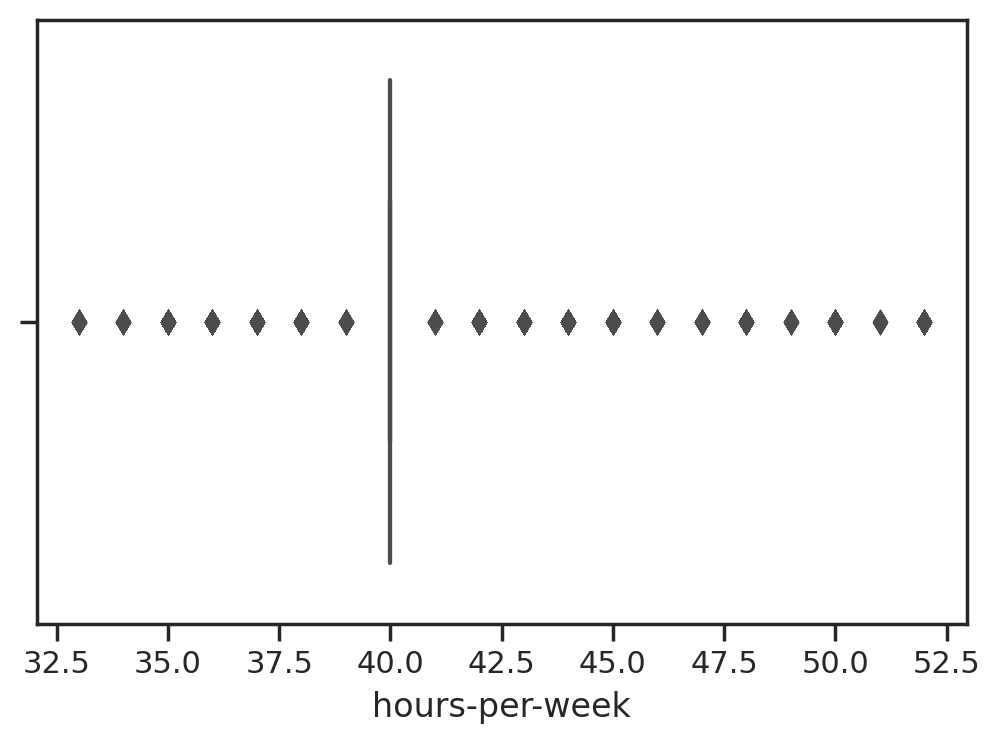

In [654]:
mi('hours-per-week')

In [655]:
df['hours-per-week'].value_counts()

40    33877
50     4165
45     2652
35     1799
48      748
38      692
42      329
36      314
44      305
37      237
43      221
52      202
46      128
47       82
39       62
33       60
41       56
34       47
49       37
51       20
Name: hours-per-week, dtype: int64

#### This column contains various outliers.Let's try to treat the outliers

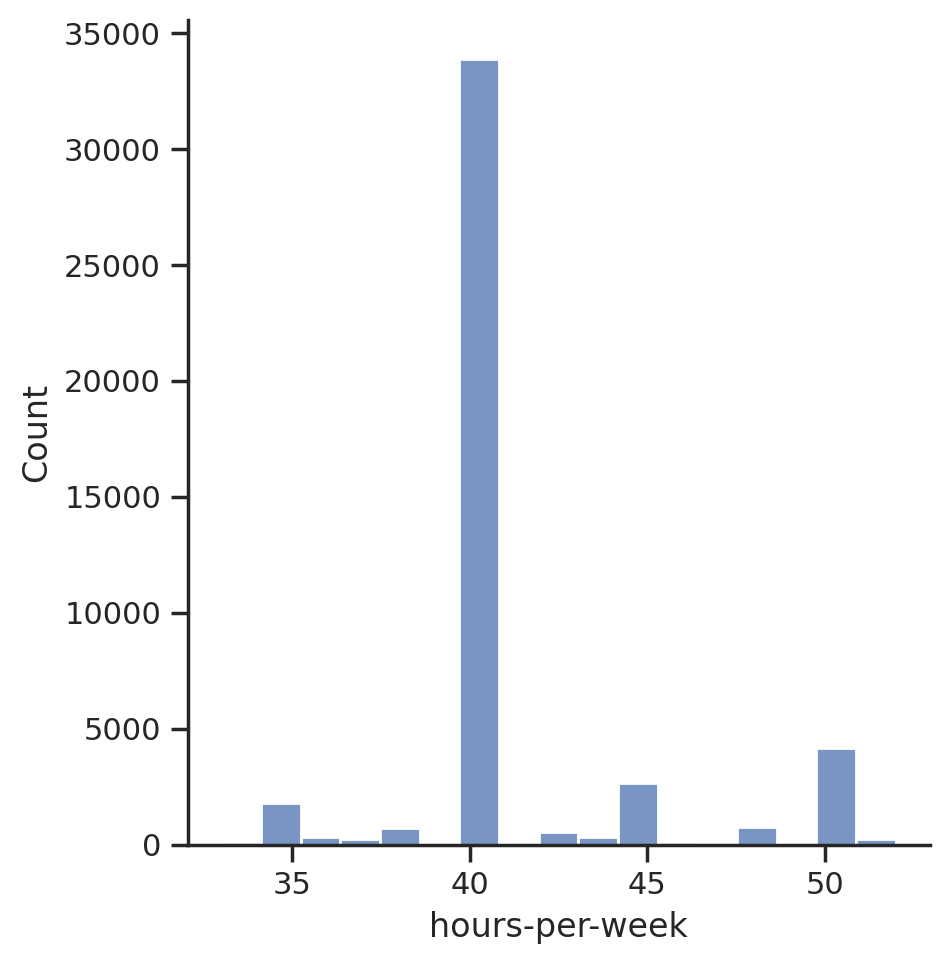

In [656]:
sns.displot(df['hours-per-week'])

#### capital

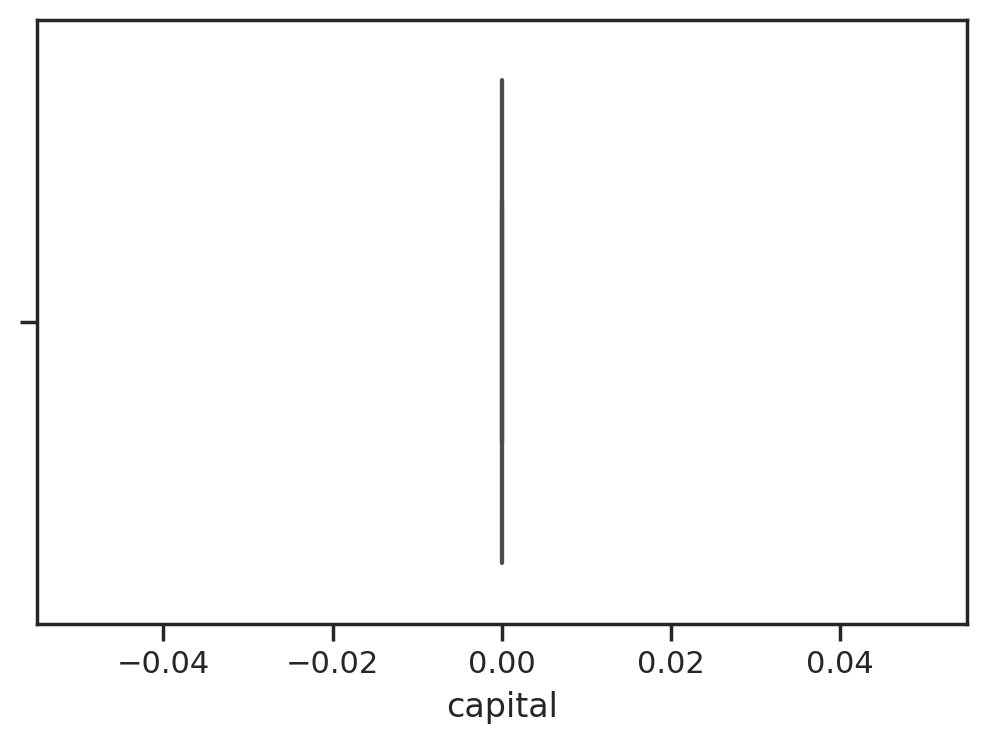

In [657]:
mi('capital')

##### Bi-variate Analysis

#### Lets make the Govt employees list

In [658]:
df.gender.value_counts()

Male      31114
Female    14919
Name: gender, dtype: int64

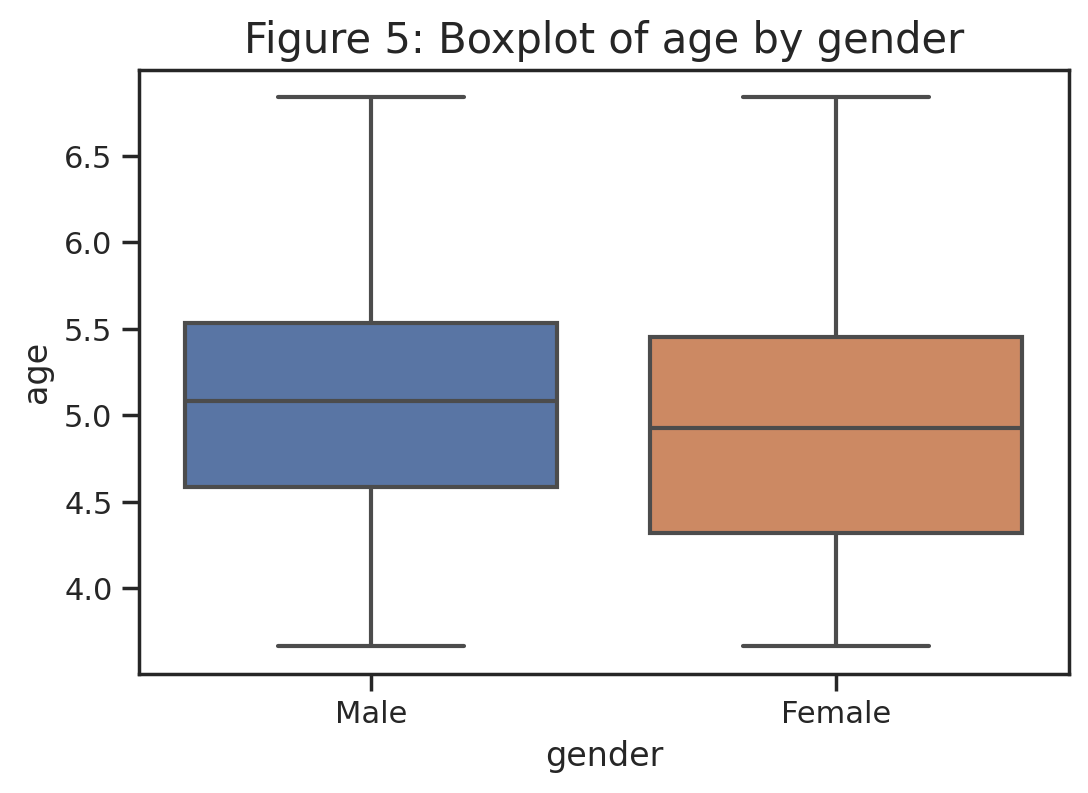

In [659]:
# Creating a boxplot
sns.boxplot(df['gender'], df['age']);
plt.title('Figure 5: Boxplot of age by gender', fontsize = 15)
plt.show();

#### We can see that the distribution of age between each gender is similar.


In [660]:
df['marital-status'].value_counts()

Married-civ-spouse       21451
Never-married            14875
Divorced                  6363
Separated                 1433
Widowed                   1296
Married-spouse-absent      583
Married-AF-spouse           32
Name: marital-status, dtype: int64

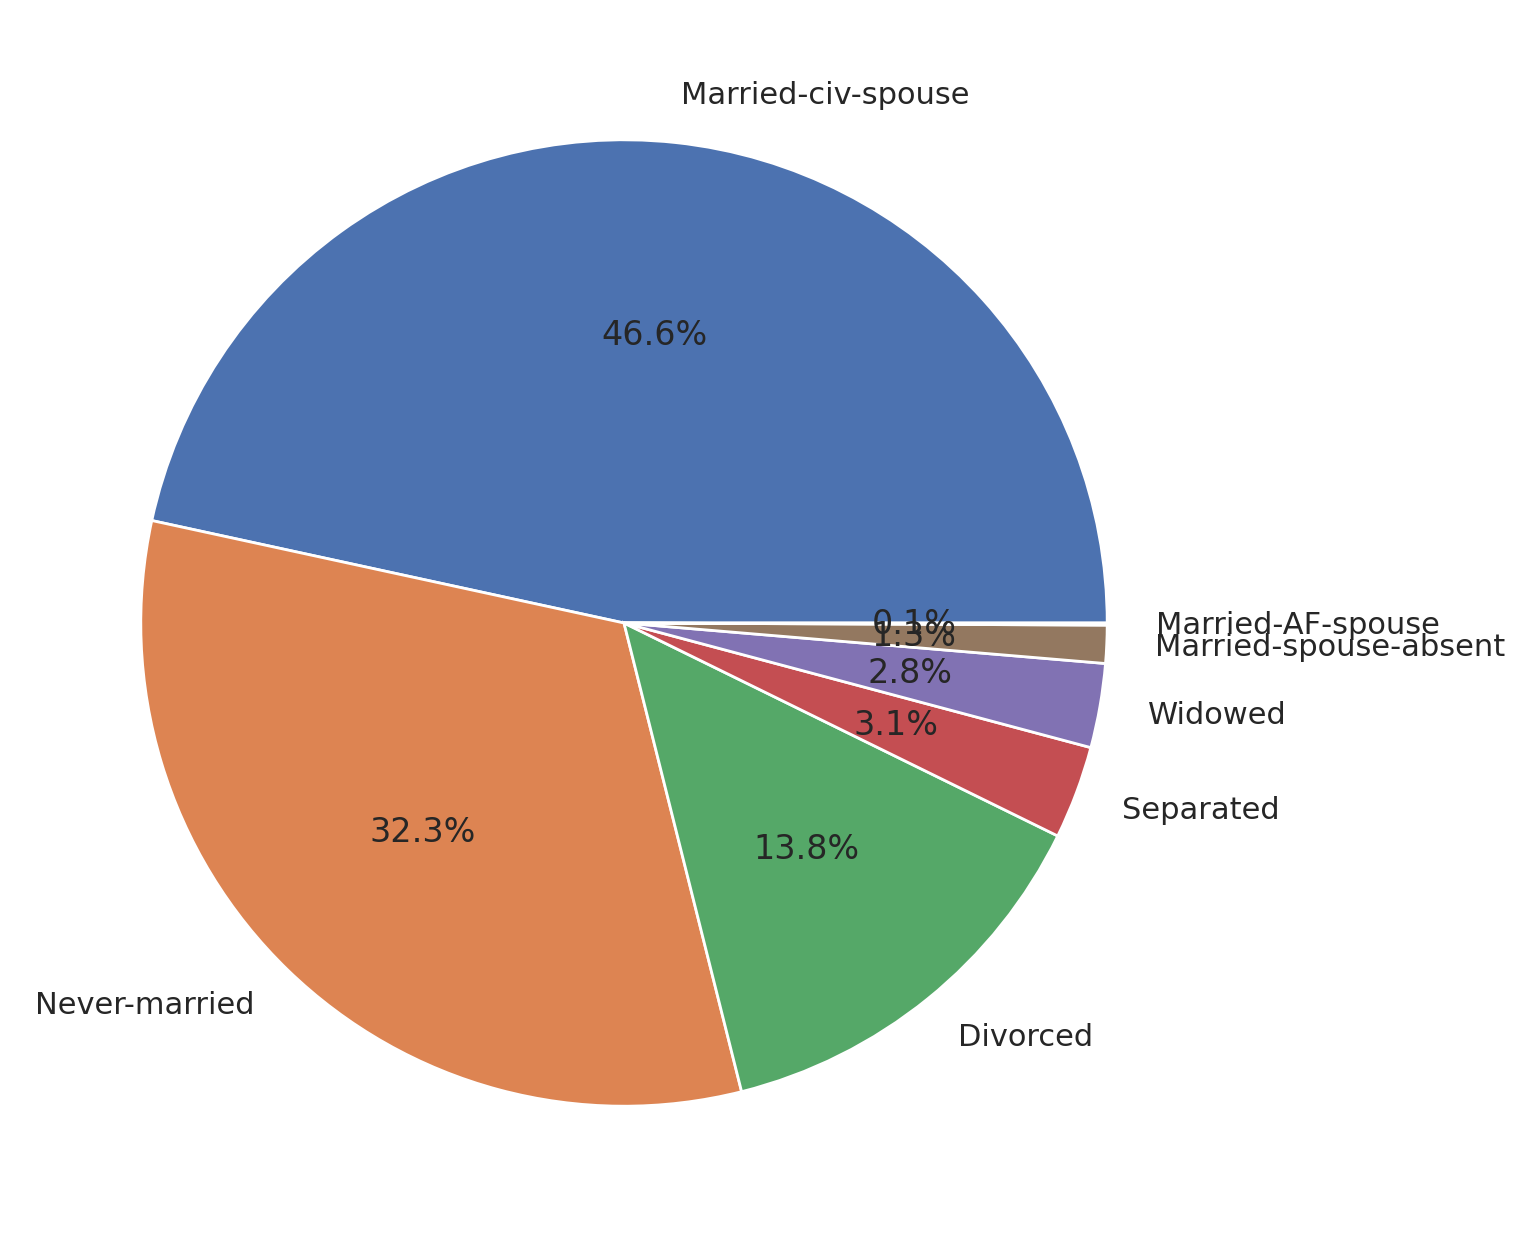

In [661]:
plt.figure(figsize=(15,8))
labels=['Married-civ-spouse','Never-married','Divorced','Separated','Widowed','Married-spouse-absent','Married-AF-spouse']
data=df['marital-status'].value_counts()
plt.pie(data,labels=labels,autopct="%.1f%%")
plt.show()

#### From the above chart we can majority of peoples are single pasanga !!! :)

#### Mans have more weekly hours in duty

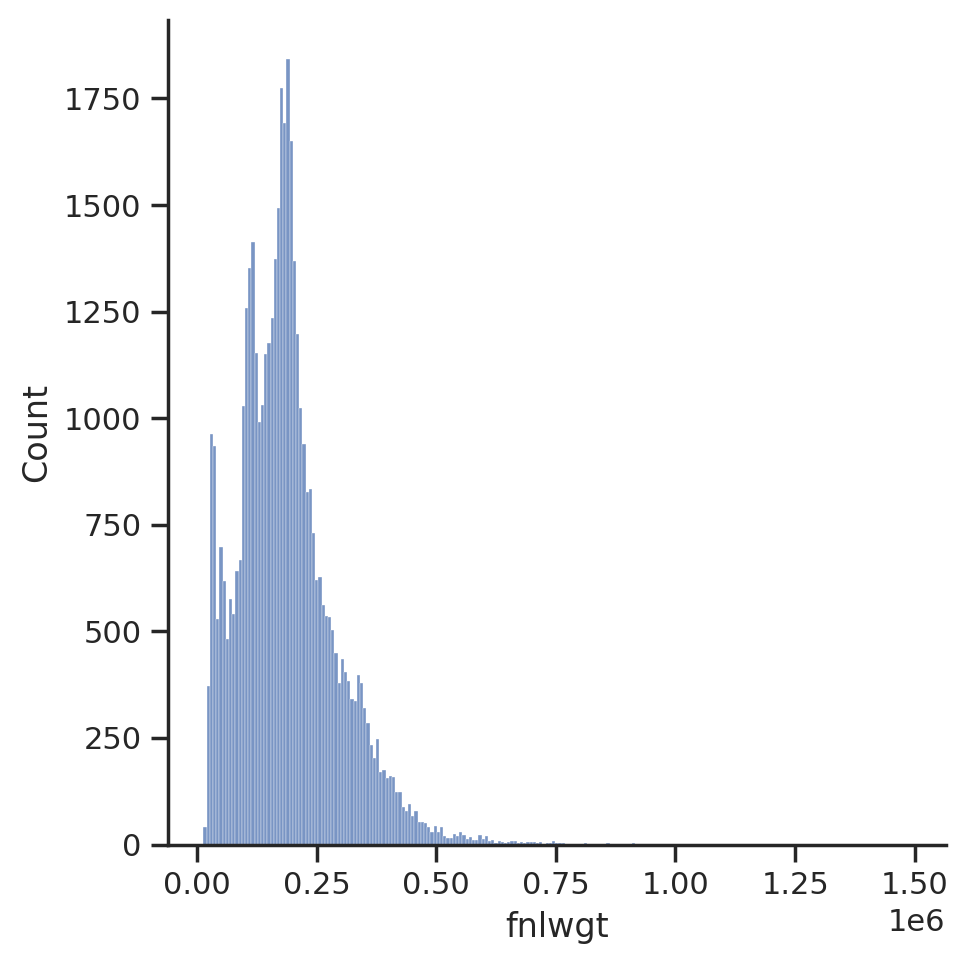

In [662]:
sns.displot(df['fnlwgt'])

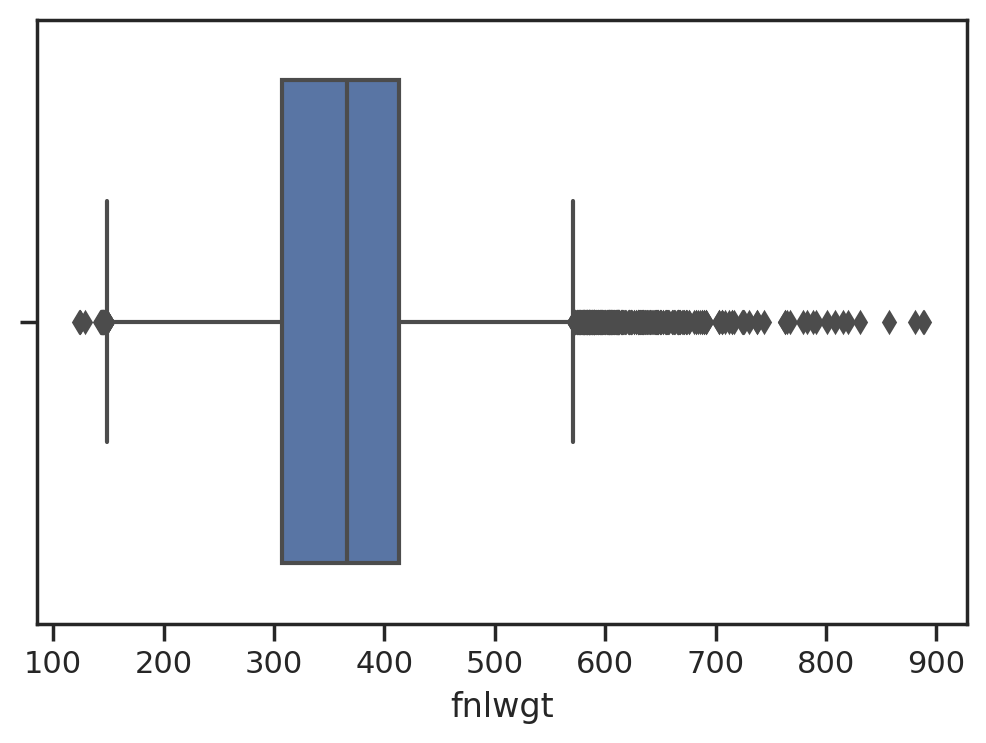

In [663]:
bxcx('fnlwgt')

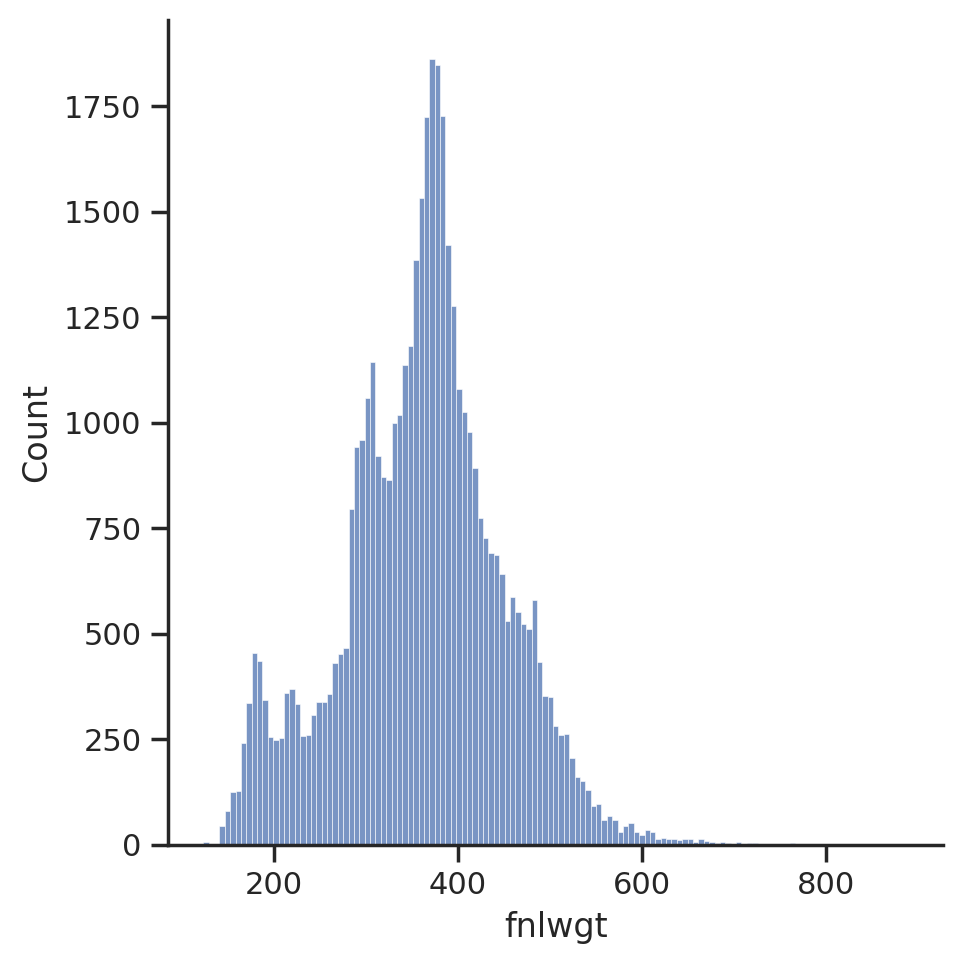

In [664]:
sns.displot(df['fnlwgt'])

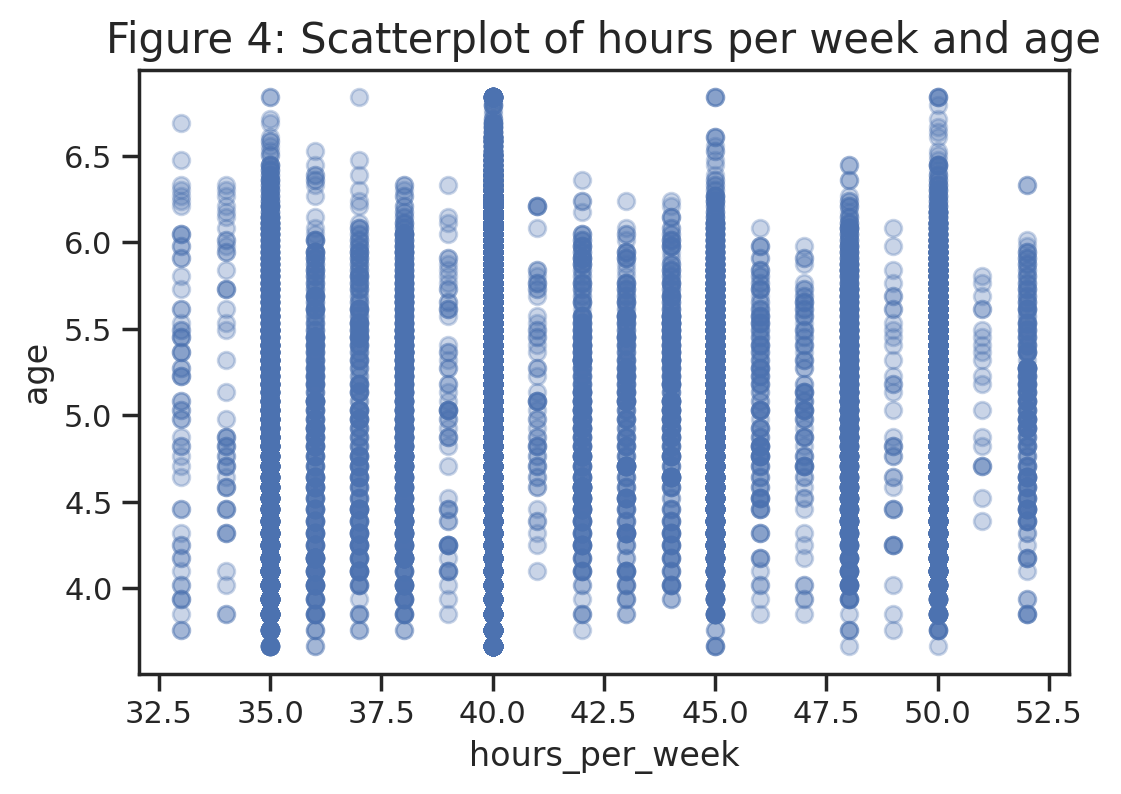

In [665]:
# store the values of hours-per-week
hpw = df['hours-per-week']

# get a scatter plot
plt.scatter(hpw, df['age'], alpha = 0.3)
plt.title('Figure 4: Scatterplot of hours per week and age', fontsize = 15)
plt.xlabel('hours_per_week')
plt.ylabel('age')
plt.show();

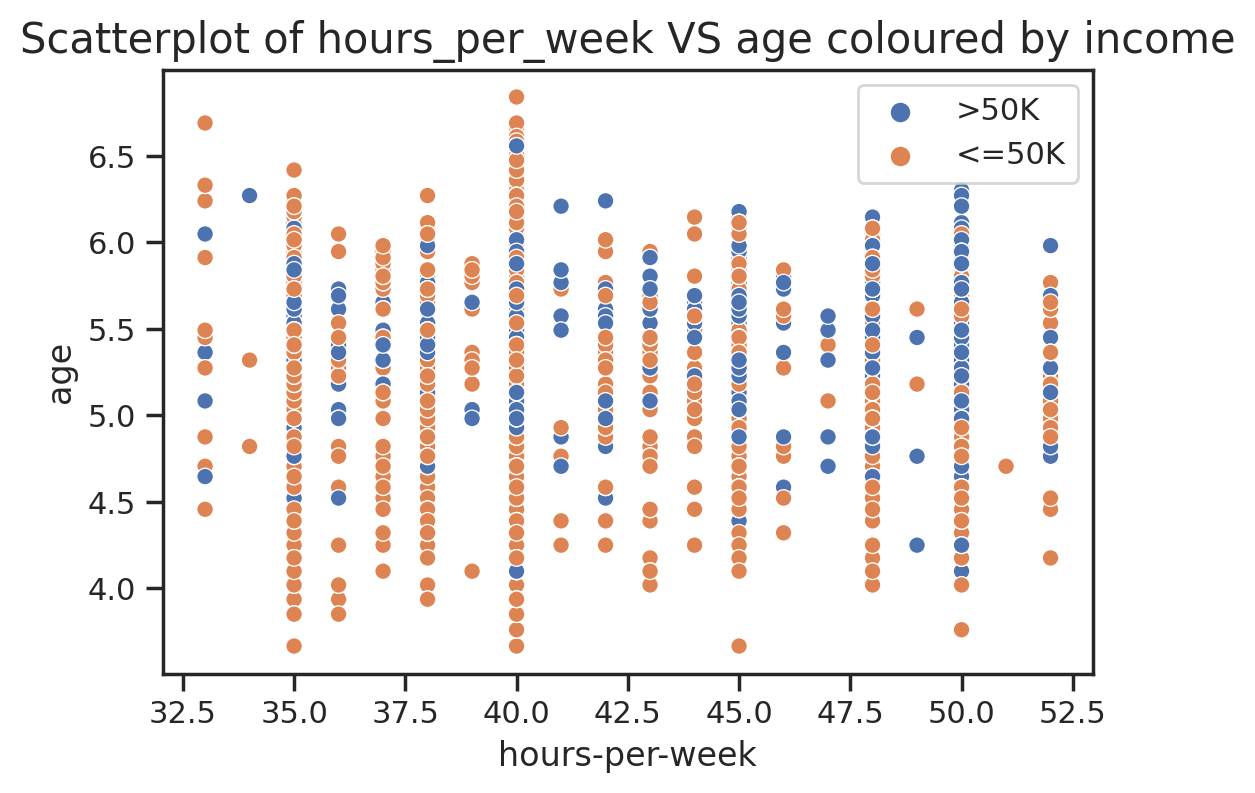

In [666]:
# Getting the index of those who work in the government
gov_emp = df['workclass'].isin(['Federal-gov','Local-gov','State-gov'])

# creating a dataframe of those who work in the government
gov = df[gov_emp]

# creating a scatterplot
sns.scatterplot(gov['hours-per-week'], gov['age'], hue = gov['income'])
plt.title('Scatterplot of hours_per_week VS age coloured by income', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();


In [667]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,capital
0,4.321006,Private,404.804708,11th,7,Never-married,Machine-op-inspct,Own-child,Other,Male,0,0,40,United-States,<=50K,0
1,5.083503,Private,274.526158,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,4.521908,Local-gov,477.742486,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0
3,5.363942,Private,350.058508,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Other,Male,7688,0,40,United-States,>50K,0
5,4.875481,Private,382.984898,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K,0


In [668]:
df['income'] = df['income'].replace({'<=50K': 'low', '>50K': 'high'})

In [669]:
df = df[df['native-country'] != "?"]

In [670]:
df['native-country'].value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [671]:
df.loc[df['native-country'] != 'United-States', 'native-country'] = 'Other-country'

#### Splitting the Data into input and Target Variable

In [672]:
from sklearn.preprocessing import MinMaxScaler
df_sklearn = df.copy()
column = ['age', 'fnlwgt', 'educational-num', 'hours-per-week', 'capital']

df_sklearn[column] = MinMaxScaler().fit_transform(np.array(df_sklearn[column]))


In [673]:
df_sklearn.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,capital
0,0.206210,Private,0.367490,11th,0.181818,Never-married,Machine-op-inspct,Own-child,Other,Male,0,0,0.368421,United-States,low,0.0
1,0.446402,Private,0.197355,HS-grad,0.363636,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,0.894737,United-States,low,0.0
2,0.269495,Local-gov,0.462742,Assoc-acdm,0.636364,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,0.368421,United-States,high,0.0
3,0.534742,Private,0.295995,Some-college,0.454545,Married-civ-spouse,Machine-op-inspct,Husband,Other,Male,7688,0,0.368421,United-States,high,0.0
5,0.380873,Private,0.338994,10th,0.090909,Never-married,Other-service,Not-in-family,White,Male,0,0,0.368421,United-States,low,0.0


In [674]:
data=pd.get_dummies(df_sklearn,drop_first=True)

In [675]:
data.columns


Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'capital', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_

In [676]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,capital,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,gender_Male,native-country_United-States,income_low
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.0,45222.000000,45222.000000,45222.000000,...,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,0.425728,0.310719,0.486433,1101.430344,88.595418,0.430948,0.0,0.068551,0.736522,0.036398,...,0.051214,0.258768,0.029831,0.146522,0.105878,0.046239,0.860267,0.675048,0.913095,0.752156
std,0.206247,0.114305,0.199655,7506.430084,404.956092,0.186405,0.0,0.252691,0.440524,0.187281,...,0.220436,0.437963,0.170122,0.353632,0.307684,0.210004,0.346714,0.468362,0.281698,0.431766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.269495,0.239989,0.363636,0.000000,0.000000,0.368421,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,0.430574,0.316831,0.454545,0.000000,0.000000,0.368421,0.0,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,0.575231,0.378194,0.727273,0.000000,0.000000,0.368421,0.0,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,99999.000000,4356.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Splitting the Data into input and Target Variable

In [677]:
target=data['income_low']
input=data.iloc[:,:53]

In [678]:
input

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,capital,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White
0,0.206210,0.367490,0.181818,0,0,0.368421,0.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0.446402,0.197355,0.363636,0,0,0.894737,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0.269495,0.462742,0.636364,0,0,0.368421,0.0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.534742,0.295995,0.454545,7688,0,0.368421,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0.380873,0.338994,0.090909,0,0,0.368421,0.0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.249050,0.396163,0.636364,0,0,0.263158,0.0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
48838,0.477053,0.288807,0.363636,0,0,0.368421,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
48839,0.707486,0.285783,0.363636,0,0,0.368421,0.0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
48840,0.136313,0.341931,0.363636,0,0,0.368421,0.0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


### Importing Decision Tree classifier

In [679]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

### Splitting the data into train and test with test ratio:20%

In [680]:
x_train,x_test,y_train,y_test=train_test_split(input,target,test_size=0.3)


In [681]:
model=DecisionTreeClassifier(criterion='entropy',random_state=0)

### Fitting the model with train data

In [682]:
model.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

### Prediction using test data

In [683]:
y_pred=model.predict(x_test)


### Model Accuracy

In [684]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=model,X=x_train,y=y_train,cv=10)
acc=acc.mean()*100

In [700]:
print('Decision Tree Accuracy : ',round(np.array(acc).mean(),2))

Decision Tree Accuracy :  0.87


#### Using KNN method

In [686]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Prediction using test data

In [687]:
y_pred=knn.predict(x_test)

### Model Accuracy

In [688]:
acc=knn.score(x_test,y_test)

In [689]:
print('KNN Accuracy : ',round(np.array(acc).mean(),2)*100,' %')

KNN Accuracy :  84.0  %


#### USing XGboost


#### Parameters of XGBoost Classifier

In [690]:
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

#### Importing the RandomizedSerachcv

In [691]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [692]:
classifier=xgboost.XGBClassifier()

In [693]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=0)

random_search.fit(input,target)


[07:27:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:27:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:27:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:27:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

#### Best Estimator using random search

In [694]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Initializing the Classifier with the best estimators

In [695]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Importing the Cross validation score

In [696]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,input,target,cv=10)


[07:29:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:29:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:29:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:29:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

#### Stratified K-Fold

In [697]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [698]:
from sklearn.model_selection import StratifiedKFold
acc=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(input,target)
for train_index,test_index in skf.split(input,target):
    #print(train_index,' ',test_index)
    x_train,x_test=input.iloc[train_index],input.iloc[test_index]
    y_train,y_test=target.iloc[train_index],target.iloc[test_index]
    classifier.fit(x_train,y_train)
    pred=classifier.predict(x_test)
    score=accuracy_score(pred,y_test)
    acc.append(score)

    
#print(acc)

[07:29:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:29:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:30:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:30:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [699]:
print('XGBoost Accuracy : ',round(np.array(acc).mean(),2)*100,' %')

XGBoost Accuracy :  87.0  %
